In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from tqdm import tqdm
#import tensorflow as tf

#print("TensorFlow version:", tf.__version__)


In [2]:
# Function to create scrollable table within a small window
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [3]:
training = pd.read_csv('C:/Users/hangu/Creative Cloud Files/0. Data Science study/Datasets/Home Credit default risk/application_train.csv')
testing = pd.read_csv('C:/Users/hangu/Creative Cloud Files/0. Data Science study/Datasets/Home Credit default risk/application_test.csv')
bureau = pd.read_csv('C:/Users/hangu/Creative Cloud Files/0. Data Science study/Datasets/Home Credit default risk/bureau.csv')                      # previous credits in Credit Bureau
bureau_balance = pd.read_csv('C:/Users/hangu/Creative Cloud Files/0. Data Science study/Datasets/Home Credit default risk/bureau_balance.csv')      # monthly balance
POS_CASH = pd.read_csv('C:/Users/hangu/Creative Cloud Files/0. Data Science study/Datasets/Home Credit default risk/POS_CASH_balance.csv')          # previous POS (point of sales) and cash loans 
credit_card = pd.read_csv('C:/Users/hangu/Creative Cloud Files/0. Data Science study/Datasets/Home Credit default risk/credit_card_balance.csv')    # previous credit cards
prev_apl = pd.read_csv('C:/Users/hangu/Creative Cloud Files/0. Data Science study/Datasets/Home Credit default risk/previous_application.csv')      # previous applications
payment = pd.read_csv('C:/Users/hangu/Creative Cloud Files/0. Data Science study/Datasets/Home Credit default risk/installments_payments.csv')      # Repayment history for the previously disbursed credits


In [4]:
print(bureau.columns, "\n")
print(len(bureau['SK_ID_CURR'].unique()))
pd.DataFrame(bureau['SK_ID_CURR'].value_counts()).transpose()

# SK_BUREAU_ID: unique in this "bureau" df
# DAYS_CREDIT: How many days before current application did client apply for Credit Bureau credit
# CREDIT_DAY_OVERDUE: Number of days past due on CB credit at the time of application for related loan in our sample
# DAYS_CREDIT_ENDDATE: Remaining duration of CB credit (in days) at the time of application in Home Credit
# DAYS_CREDIT_UPDATE: How many days before loan application did last information about the Credit Bureau credit come

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object') 

218292


SK_ID_CURR,120860,169704,318065,251643,425396,295809,177014,280155,252366,218175,...,304748,430469,160781,334642,127041,234522,180076,171655,258946,399573
count,116,81,78,61,60,59,56,55,55,55,...,1,1,1,1,1,1,1,1,1,1


In [5]:
print(bureau_balance.columns, "\n")
pd.DataFrame(bureau_balance['SK_ID_BUREAU'].value_counts()).transpose()     # Number of Months in balance = count - 1

# MONTHS_BALANCE: Month of balance relative to application date (-1 means the freshest balance date)
# STATUS: Status of Credit Bureau loan during the month (C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,… 5 means DPD 120+ or sold or written off ] )

Index(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype='object') 



SK_ID_BUREAU,5907926,6786422,6028907,5229867,6363619,5002065,5817528,5817489,5817435,5002064,...,5253267,5708683,5709203,5708684,5242749,5052730,5207756,6543954,6364503,5005798
count,97,97,97,97,97,97,97,97,97,97,...,1,1,1,1,1,1,1,1,1,1


In [6]:
print(POS_CASH.columns, "\n")
print(len(POS_CASH['SK_ID_CURR'].unique()))
POS_CASH.sort_values(by='MONTHS_BALANCE')

# SK_ID_PREV: ID of previous credit in Home Credit
# CNT_INSTALMENT: Term of previous credit (can change over time)
# SK_DPD: DPD (days past due) during the month of previous credit

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object') 

337252


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
767082,1775141,244572,-96,4.0,2.0,Active,0,0
3573052,1595167,454443,-96,10.0,3.0,Active,17,0
5231758,2588917,294677,-96,4.0,2.0,Active,0,0
2251801,1810403,145248,-96,10.0,0.0,Active,0,0
727339,1925384,330163,-96,12.0,6.0,Active,0,0
...,...,...,...,...,...,...,...,...
3887454,2385634,121591,-1,48.0,27.0,Active,0,0
2388448,1335383,186424,-1,48.0,38.0,Active,0,0
7348487,2318117,271325,-1,10.0,8.0,Active,0,0
871138,1900506,208057,-1,12.0,10.0,Active,0,0


In [7]:
sample = POS_CASH.groupby(['SK_ID_CURR', 'SK_ID_PREV'])['MONTHS_BALANCE'].min()

df_sample = pd.DataFrame(sample)
df_sample = df_sample.reset_index()
df_sample

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE
0,100001,1369693,-57
1,100001,1851984,-96
2,100002,1038818,-19
3,100003,1810518,-25
4,100003,2396755,-77
...,...,...,...
936320,456255,1359084,-15
936321,456255,1743609,-33
936322,456255,2073384,-21
936323,456255,2631384,-26


In [8]:
a = POS_CASH[POS_CASH['SK_ID_CURR']==100001]
a[a['SK_ID_PREV']==1369693].sort_values(by='MONTHS_BALANCE')

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
7167007,1369693,100001,-57,4.0,4.0,Active,0,0
8789081,1369693,100001,-56,4.0,3.0,Active,0,0
7823681,1369693,100001,-55,4.0,2.0,Active,0,0
4704415,1369693,100001,-54,4.0,1.0,Active,0,0
2197888,1369693,100001,-53,4.0,0.0,Completed,0,0


In [9]:
df_sample[df_sample['SK_ID_CURR']==265042]

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE
433077,265042,1130567,-20
433078,265042,1162724,-70
433079,265042,1211034,-49
433080,265042,1295332,-90
433081,265042,1295333,-79
433082,265042,1330669,-54
433083,265042,1364905,-36
433084,265042,1510354,-96
433085,265042,1570060,-54
433086,265042,1735921,-85


In [10]:
print(credit_card.columns, "\n")
print(len(credit_card['SK_ID_CURR'].unique()))
credit_card

# AMT_BALANCE: Balance during the month of previous credit
# AMT_CREDIT_LIMIT_ACTUAL: Credit card limit during the month of the previous credit
# AMT_DRAWINGS_ATM_CURRENT: Amount drawing at ATM during the month of the previous credit
# AMT_DRAWINGS_CURRENT: Amount drawing during the month of the previous credit
# AMT_PAYMENT_CURRENT: How much did the client pay during the month on the previous credit
# CNT_DRAWINGS_ATM_CURRENT: Number of drawings at ATM during this month on the previous credit

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object') 



103558


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


In [11]:
col_list = ['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE']
sample = credit_card[col_list].sort_values(by='MONTHS_BALANCE')
sample

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE
24268,2191008,186722,-96
841327,1462198,437589,-96
2725728,2181176,123766,-96
2725726,1365551,162637,-96
841332,1619825,271412,-96
...,...,...,...
395926,2116047,243443,-1
395931,1396266,163805,-1
395938,1468878,269362,-1
395901,1367649,167456,-1


In [12]:
credit_card_gr = credit_card.groupby(['SK_ID_CURR', 'SK_ID_PREV'])['MONTHS_BALANCE'].min()

df_credit_card_gr = pd.DataFrame(credit_card_gr)
df_credit_card_gr = df_credit_card_gr.reset_index()
df_credit_card_gr

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE
0,100006,1489396,-6
1,100011,1843384,-75
2,100013,2038692,-96
3,100021,2594025,-18
4,100023,1499902,-11
...,...,...,...
104302,456244,2181926,-41
104303,456246,1079732,-9
104304,456247,1595171,-96
104305,456248,2743495,-24


In [13]:
df_credit_card_gr[df_credit_card_gr['SK_ID_CURR']==186401]

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE
25108,186401,1440617,-96
25109,186401,2243411,-96


In [14]:
print(prev_apl.columns, "\n")
print(len(prev_apl['SK_ID_CURR'].unique()))
prev_apl

# AMT_APPLICATION: For how much credit did client ask on the previous application
# AMT_CREDIT: Final credit amount on the previous application.
# AMT_DOWN_PAYMENT: Down payment on the previous application
# NFLAG_LAST_APPL_IN_DAY: Flag if the application was the last application per day of the client. Sometimes clients apply for more applications a day. Rarely it could also be error in our system that one application is in the database twice
# RATE_INTEREST_PRIMARY: Interest rate normalized on previous credit
# RATE_INTEREST_PRIVILEGED: Interest rate normalized on previous credit
# CODE_REJECT_REASON: Why was the previous application rejected
# NAME_GOODS_CATEGORY: What kind of goods did the client apply for in the previous application
# SELLERPLACE_AREA: Selling area of seller place of the previous application
# NAME_YIELD_GROUP: Grouped interest rate into small medium and high of the previous application


Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object') 

338857


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [15]:
print(payment.columns, "\n")
print(len(payment['SK_ID_CURR'].unique()))
payment

# NUM_INSTALMENT_VERSION: Version of installment calendar (0 is for credit card) of previous credit.
# NUM_INSTALMENT_NUMBER: On which installment we observe payment
# AMT_INSTALMENT: What was the prescribed installment amount of previous credit on this installment
# AMT_PAYMENT: What the client actually paid on previous credit on this installment


Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object') 

339587


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [16]:
testing

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [17]:
perc_1 = len(training[training['TARGET']==1])/training.shape[0] * 100
print(f'Percentage of clients with payment difficulties: {(perc_1):.2f} %', "\n")
print(training.columns)
training

# TARGET: (1) client with payment difficulties, (0) all other cases

# DAYS_BIRTH: Client's age in days at the time of application
# DAYS_EMPLOYED: How many days before the application the person started current employment

# REGION_RATING_CLIENT: Our rating of the region where client lives (1,2,3)
# REGION_RATING_CLIENT_W_CITY: Our rating of the region where client lives with taking city into account (1,2,3)

# WEEKDAY_APPR_PROCESS_START: On which day of the week did the client apply for the loan

# AMT_REQ_CREDIT_BUREAU_YEAR: Number of enquiries to Credit Bureau about the client one year before application (excluding last 3 months before application)


Percentage of clients with payment difficulties: 8.07 % 

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
def common_elements(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    return list(set1.intersection(set2))

In [19]:
def join_uniques(*lists):
    unique_values = set()
    for lst in lists:
        unique_values.update(lst)
    return list(unique_values)

In [20]:
ID_CURR_train = list(training['SK_ID_CURR'].unique())
ID_CURR_test = list(testing['SK_ID_CURR'].unique())
ID_CURR_all = ID_CURR_train + ID_CURR_test

ID_CURR_bur = list(bureau['SK_ID_CURR'].unique())
ID_CURR_pos = list(POS_CASH['SK_ID_CURR'].unique())
ID_CURR_cc = list(credit_card['SK_ID_CURR'].unique())
ID_CURR_prev = list(prev_apl['SK_ID_CURR'].unique())
ID_CURR_inst = list(payment['SK_ID_CURR'].unique())
ID_CURR_all_other = join_uniques(ID_CURR_bur, ID_CURR_pos, ID_CURR_cc, ID_CURR_prev, ID_CURR_inst)

print(len(ID_CURR_all))
print(len(ID_CURR_all_other))
print(len(common_elements(ID_CURR_all, ID_CURR_all_other)))

# len(ID_CURR_all) > len(ID_CURR_all_other)                                         ==> some data in train|test do not appear in other sets
# len(ID_CURR_all_other) = len(common_elements(ID_CURR_all, ID_CURR_all_other))     ==> all data in other sets is in train|test

356255
349736
349736


In [21]:
df_num = training.select_dtypes(include=['int64', 'float64'])
df_num = df_num.drop(['SK_ID_CURR', 'TARGET'], axis=1)
print(len(df_num.columns))

stats_num = df_num.describe().T
scroll_stats_num = create_scrollable_table(stats_num, 'stats_num', 'Numeric statistic summary (training)')
display(HTML(scroll_stats_num))

104


,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05
DAYS_REGISTRATION,307511.0,-4986.120328,3522.886321,-2.467200e+04,-7479.500000,-4504.000000,-2010.000000,0.000000e+00
DAYS_ID_PUBLISH,307511.0,-2994.202373,1509.450419,-7.197000e+03,-4299.000000,-3254.000000,-1720.000000,0.000000e+00


In [22]:
df_cat = training.select_dtypes(include=object)
print(len(df_cat.columns))

stats_cat = df_cat.describe().T
scroll_stats_cat = create_scrollable_table(stats_cat, 'stats_cat', 'Categorical statistic summary (training)')
display(HTML(scroll_stats_cat))

16


,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,211120,18,Laborers,55186


In [23]:
# Columns which are supposed to be categorical: FLAG_xxx, REGION_RATING_xxx, REG_xxx, LIVE_xxx

for col in training.columns:
    if (('FLAG' in col) or ('REGION_RATING_' in col) or ('REG_' in col) or ('LIVE_' in col)):
        training[col] = training[col].astype(str)
        testing[col] = testing[col].astype(str)

In [24]:
# Column DAYS_EMPLOYED contain data showing > 1000 years, which is wrong.

#for ds in [training, testing]:
#    median_val = ds.loc[ds['DAYS_EMPLOYED'] < 300000, 'DAYS_EMPLOYED'].median()
#    ds.loc[ds['DAYS_EMPLOYED'] > 300000, 'DAYS_EMPLOYED'] = median_val

# For DAYS_EMPLOYED column, instead of imputing the median value, let's fill in the anomalous values with not a number (np.nan) 
# and then create a new boolean column indicating whether or not the value was anomalous [15].

for ds in [training, testing]:
    ds['DAYS_EMPLOYED_ANOM'] = (ds['DAYS_EMPLOYED'] > 300000).astype(int).astype(str)
    ds.loc[ds['DAYS_EMPLOYED'] > 300000, 'DAYS_EMPLOYED'] = np.NaN

In [25]:
df_num = training.select_dtypes(include=['int64', 'float64'])
df_num = df_num.drop(['SK_ID_CURR', 'TARGET'], axis=1)
print(len(df_num.columns))

stats_num = df_num.describe().T
scroll_stats_num = create_scrollable_table(stats_num, 'stats_num', 'Numeric statistic summary (training)')
display(HTML(scroll_stats_num))

70


,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,252137.0,-2384.169325,2338.360162,-1.791200e+04,-3175.000000,-1648.000000,-767.000000,0.000000e+00
DAYS_REGISTRATION,307511.0,-4986.120328,3522.886321,-2.467200e+04,-7479.500000,-4504.000000,-2010.000000,0.000000e+00
DAYS_ID_PUBLISH,307511.0,-2994.202373,1509.450419,-7.197000e+03,-4299.000000,-3254.000000,-1720.000000,0.000000e+00


In [26]:
df_cat = training.select_dtypes(include=object)
print(len(df_cat.columns))

stats_cat = df_cat.describe().T
scroll_stats_cat = create_scrollable_table(stats_cat, 'stats_cat', 'Categorical statistic summary (training)')
display(HTML(scroll_stats_cat))

51


,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
FLAG_MOBIL,307511,2,1,307510


In [27]:
training.shape[0]

307511

In [28]:
null_count_trn = training.isnull().sum().to_frame() / training.shape[0] * 100
scroll_null_count = create_scrollable_table(null_count_trn, 'num_count', 'Missing values % in each column (training)')
display(HTML(scroll_null_count))

,0
SK_ID_CURR,0.000000
TARGET,0.000000
NAME_CONTRACT_TYPE,0.000000
CODE_GENDER,0.000000
FLAG_OWN_CAR,0.000000
FLAG_OWN_REALTY,0.000000
CNT_CHILDREN,0.000000
AMT_INCOME_TOTAL,0.000000
AMT_CREDIT,0.000000
AMT_ANNUITY,0.003902


In [29]:
large_null_trn = null_count_trn[null_count_trn.values >= 5].sort_values(by=0, ascending=False)
scroll_large_null_trn = create_scrollable_table(large_null_trn, 'large_null', 'Columns with a lot of missing values (training)')
display(HTML(scroll_large_null_trn))

,0
COMMONAREA_AVG,69.872297
COMMONAREA_MODE,69.872297
COMMONAREA_MEDI,69.872297
NONLIVINGAPARTMENTS_MEDI,69.432963
NONLIVINGAPARTMENTS_AVG,69.432963
NONLIVINGAPARTMENTS_MODE,69.432963
FONDKAPREMONT_MODE,68.386172
LIVINGAPARTMENTS_MODE,68.354953
LIVINGAPARTMENTS_AVG,68.354953
LIVINGAPARTMENTS_MEDI,68.354953


In [30]:
null_count_tst = testing.isnull().sum().to_frame() / testing.shape[0] * 100
large_null_tst = null_count_tst[null_count_tst.values >= 5].sort_values(by=0, ascending=False)
scroll_large_null_tst = create_scrollable_table(large_null_tst, 'large_null', 'Columns with a lot of missing values (testing)')
display(HTML(scroll_large_null_tst))

,0
COMMONAREA_AVG,68.716150
COMMONAREA_MEDI,68.716150
COMMONAREA_MODE,68.716150
NONLIVINGAPARTMENTS_AVG,68.412523
NONLIVINGAPARTMENTS_MODE,68.412523
NONLIVINGAPARTMENTS_MEDI,68.412523
FONDKAPREMONT_MODE,67.284179
LIVINGAPARTMENTS_AVG,67.249302
LIVINGAPARTMENTS_MEDI,67.249302
LIVINGAPARTMENTS_MODE,67.249302


In [31]:
print(len(large_null_trn))
print(len(large_null_tst))

# Both training and testing have the same number of columns with lots of missing values

58
58


In [32]:
non_null_col = null_count_trn[null_count_trn.values==0].index
large_null_col = large_null_trn.index
small_null_col_trn = [col for col in list(training.columns) if col not in (list(non_null_col)+list(large_null_col))]
small_null_col_trn

# Columns with small amount of missing values (training)

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

In [33]:
non_null_col = null_count_tst[null_count_tst.values==0].index
large_null_col = large_null_tst.index
small_null_col_tst = [col for col in list(testing.columns) if col not in (list(non_null_col)+list(large_null_col))]
small_null_col_tst

# Columns with small amount of missing values (testing)

['AMT_ANNUITY',
 'NAME_TYPE_SUITE',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

In [34]:
# As the three EXT_SOURCE features have relative high negative correlations with the TARGET (suggesting that as the value of the EXT_SOURCE
# increases, the client is more likely to repay the loan), we will keep all those 3.

# We also keep 'OWN_CAR_AGE', 'DAYS_EMPLOYED'
large_null_col = large_null_col.drop(['EXT_SOURCE_1', 'EXT_SOURCE_3', 'OWN_CAR_AGE', 'DAYS_EMPLOYED'])

excl_lrg_missing_training = training.drop(large_null_col, axis=1)
excl_lrg_missing_testing = testing.drop(large_null_col, axis=1)

In [35]:
print(excl_lrg_missing_training.shape)
print(excl_lrg_missing_testing.shape)

(307511, 69)
(48744, 68)


In [36]:
df_num_excl = excl_lrg_missing_training.select_dtypes(include=['int64', 'float64'])
df_num_excl = df_num_excl.drop(['SK_ID_CURR', 'TARGET'], axis=1)
print(len(df_num_excl.columns))

df_cat_excl = excl_lrg_missing_training.select_dtypes(include=object)
print(len(df_cat_excl))

21
307511


In [37]:
pd.pivot_table(excl_lrg_missing_training, index='TARGET', columns='CODE_GENDER', values='SK_ID_CURR', aggfunc='count')

# Percentage of Female with difficuties: 7% 
# Percentage of Male with difficuties: 10%      ==> HIGH

CODE_GENDER,F,M,XNA
TARGET,,,
0,188278.0,94404.0,4.0
1,14170.0,10655.0,NaN


In [38]:
pd.pivot_table(excl_lrg_missing_training, index='TARGET', columns='FLAG_OWN_CAR', values='SK_ID_CURR', aggfunc='count')

# Percentage of "No car" with difficuties: 8.5% 
# Percentage of "Have car" with difficuties: 7.2% 

FLAG_OWN_CAR,N,Y
TARGET,,
0,185675,97011
1,17249,7576


In [39]:
pd.pivot_table(excl_lrg_missing_training, index='TARGET', columns='FLAG_OWN_REALTY', values='SK_ID_CURR', aggfunc='count')

# Percentage of "No house" with difficuties: 8.3% 
# Percentage of "Have car" with difficuties: 7.9% 

FLAG_OWN_REALTY,N,Y
TARGET,,
0,86357,196329
1,7842,16983


In [40]:
pd.pivot_table(excl_lrg_missing_training, index='TARGET', columns='NAME_INCOME_TYPE', values='SK_ID_CURR', aggfunc='count')

# Percentage of "Commercial associate" with difficuties: 7.5% 
# Percentage of "Pensioner" with difficuties: 5.3% 
# Percentage of "State servant" with difficuties: 5.8% 
# Percentage of "Working" with difficuties: 9.6%            ==> HIGH

NAME_INCOME_TYPE,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working
TARGET,,,,,,,,
0,10.0,66257.0,3.0,52380.0,20454.0,18.0,14.0,143550.0
1,NaN,5360.0,2.0,2982.0,1249.0,NaN,8.0,15224.0


84


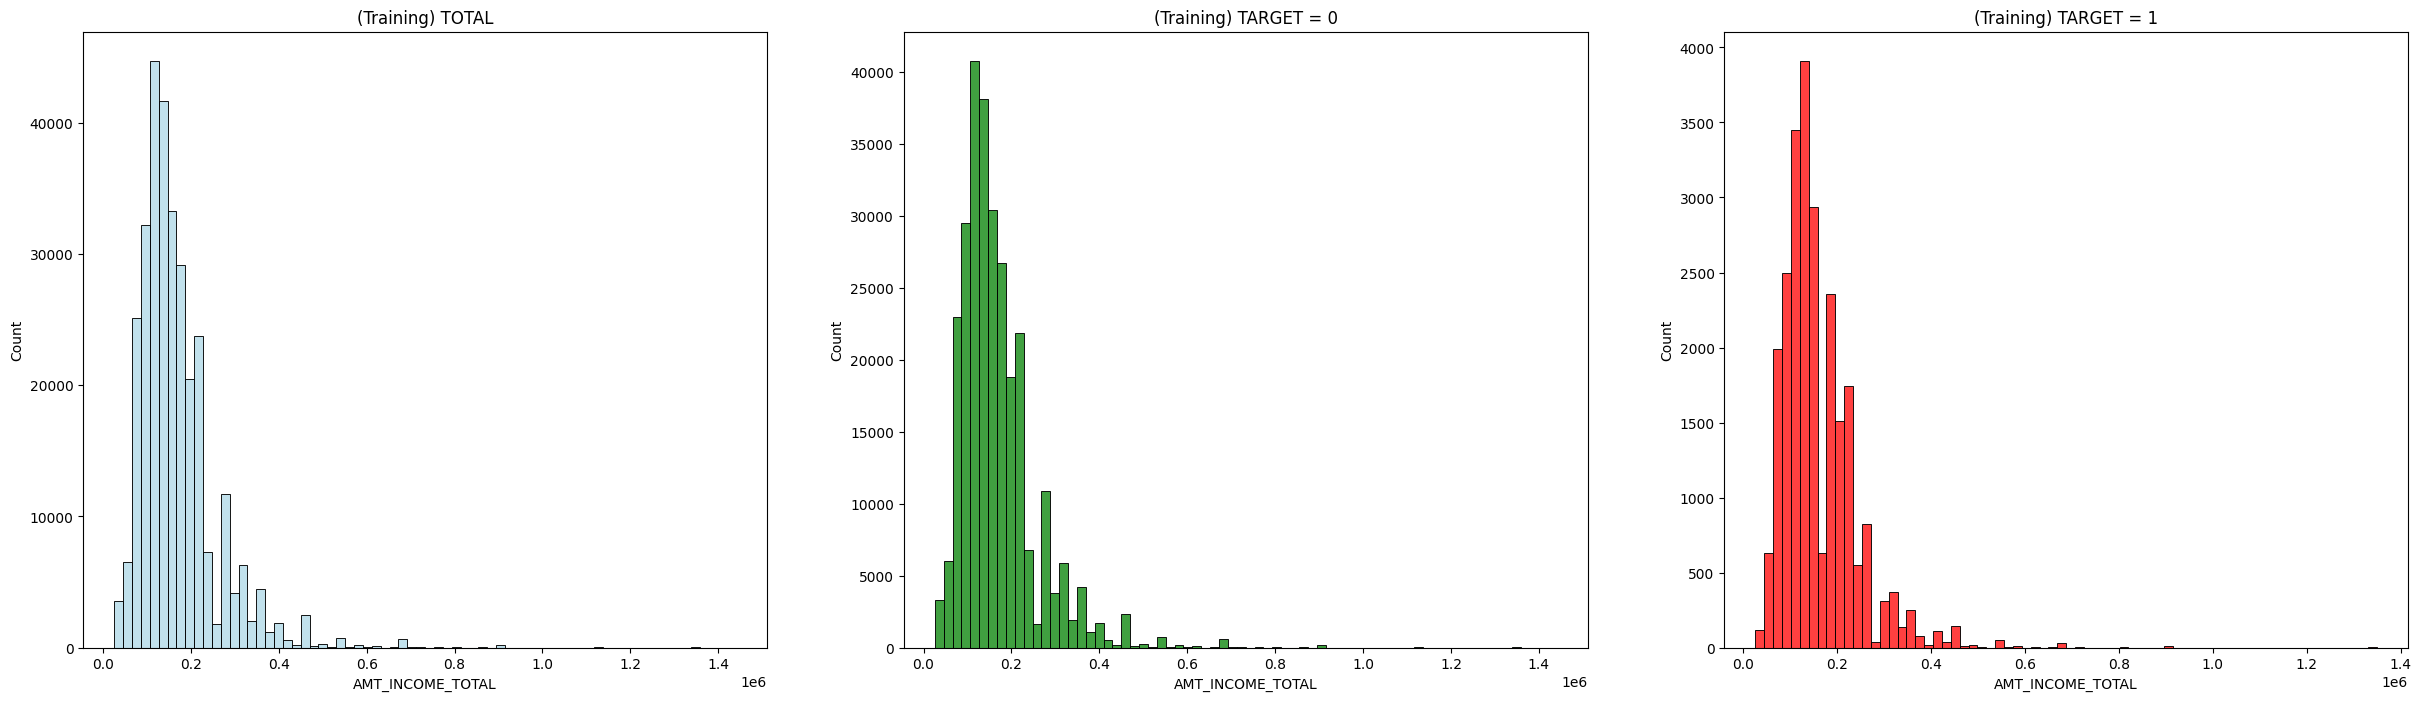

In [41]:
#Histograms of AMT_INCOME_TOTAL, AMT_CREDIT, REGION_POPULATION_RELATIVE, DAYS_EMPLOYED,  for both TARGET = 0 and = 1
i = 0
fig, ax = plt.subplots(1, 3, figsize=(30, 8))

total = training[training['AMT_INCOME_TOTAL'] < 1500000]
target_0 = training[(training['AMT_INCOME_TOTAL'] < 1500000) & (training['TARGET']==0)]
target_1 = training[(training['AMT_INCOME_TOTAL'] < 1500000) & (training['TARGET']==1)]

df_list = [total, target_0, target_1]

for ds in df_list:
    i += 1
    plt.subplot(1, 3, i)

    if i==1:
        color = 'lightblue'
        plt.title('(Training) TOTAL')
    elif i==2:
        color = 'green'
        plt.title('(Training) TARGET = 0')
    else:
        color = 'red'
        plt.title('(Training) TARGET = 1')

    sns.histplot(ds['AMT_INCOME_TOTAL'], bins=70, color=color)
    

print(len(training)-len(total))


4050000.0

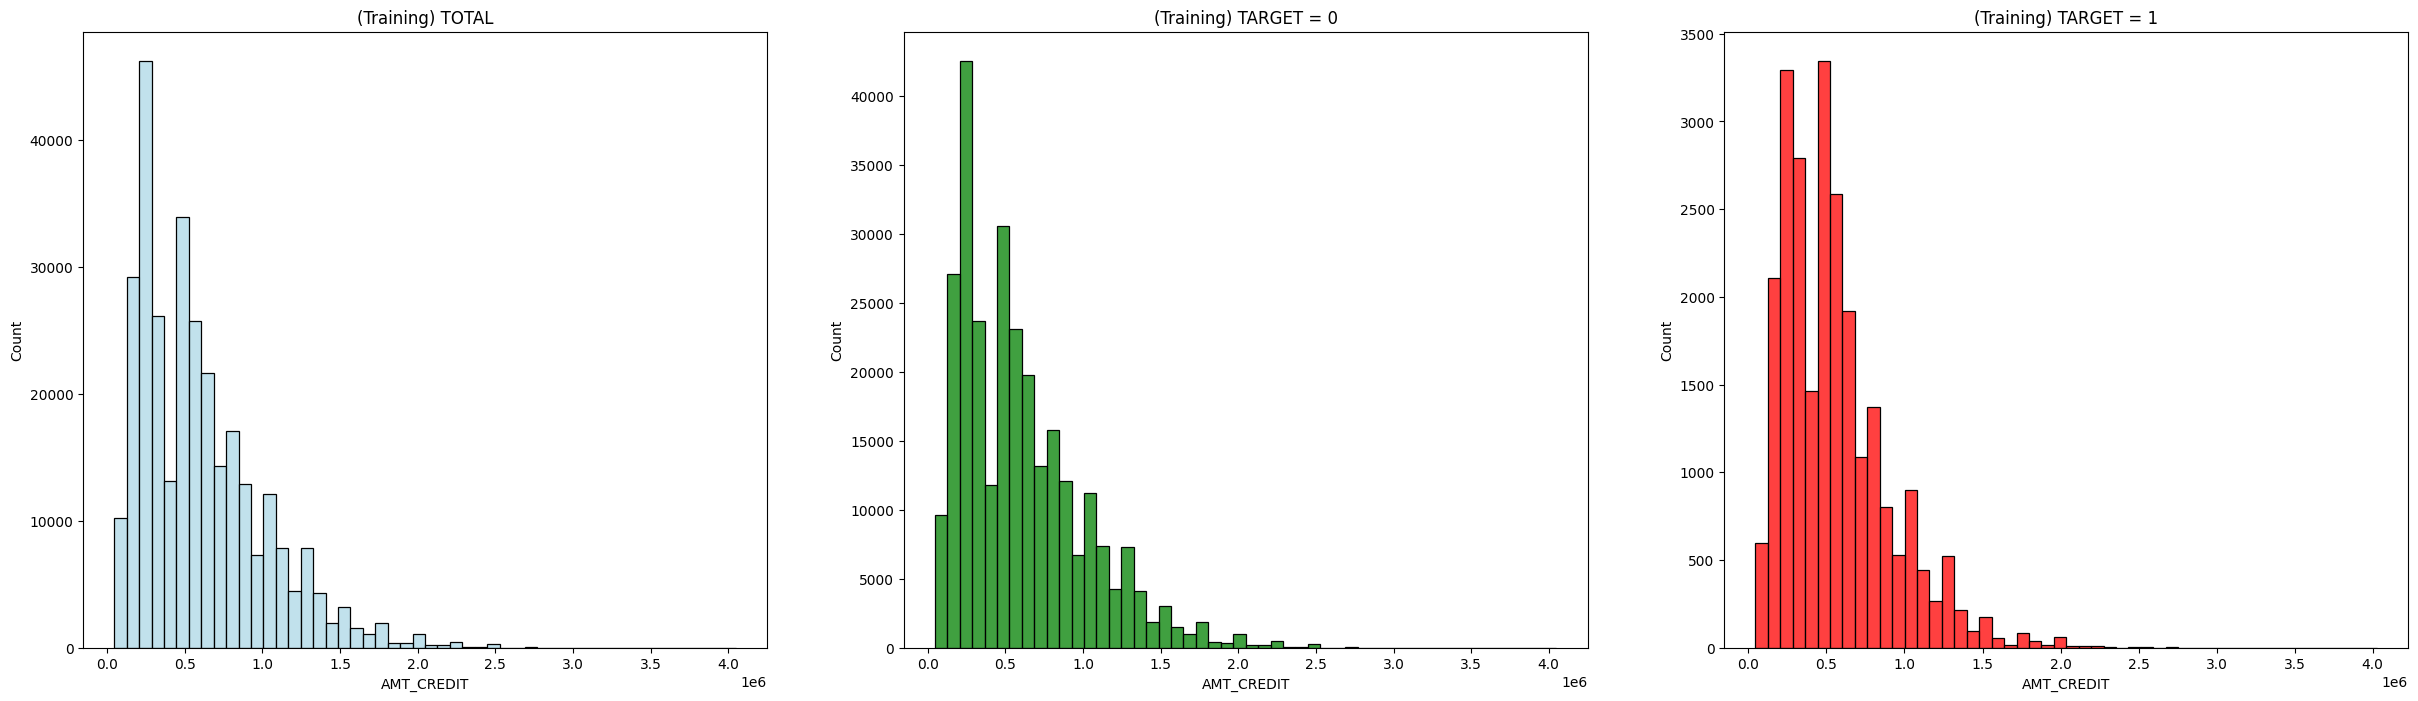

In [42]:
i = 0
fig, ax = plt.subplots(1, 3, figsize=(30, 8))

total = training
target_0 = training[training['TARGET']==0]
target_1 = training[training['TARGET']==1]

df_list = [total, target_0, target_1]

for ds in df_list:
    i += 1
    plt.subplot(1, 3, i)

    if i==1:
        color = 'lightblue'
        plt.title('(Training) TOTAL')
    elif i==2:
        color = 'green'
        plt.title('(Training) TARGET = 0')
    else:
        color = 'red'
        plt.title('(Training) TARGET = 1')

    sns.histplot(ds['AMT_CREDIT'], bins=50, color=color)

training['AMT_CREDIT'].max()

223701    0.072508
294650    0.072508
10496     0.072508
294671    0.072508
10500     0.072508
            ...   
78542     0.000533
195339    0.000533
257223    0.000533
280258    0.000290
248609    0.000290
Name: REGION_POPULATION_RELATIVE, Length: 307511, dtype: float64

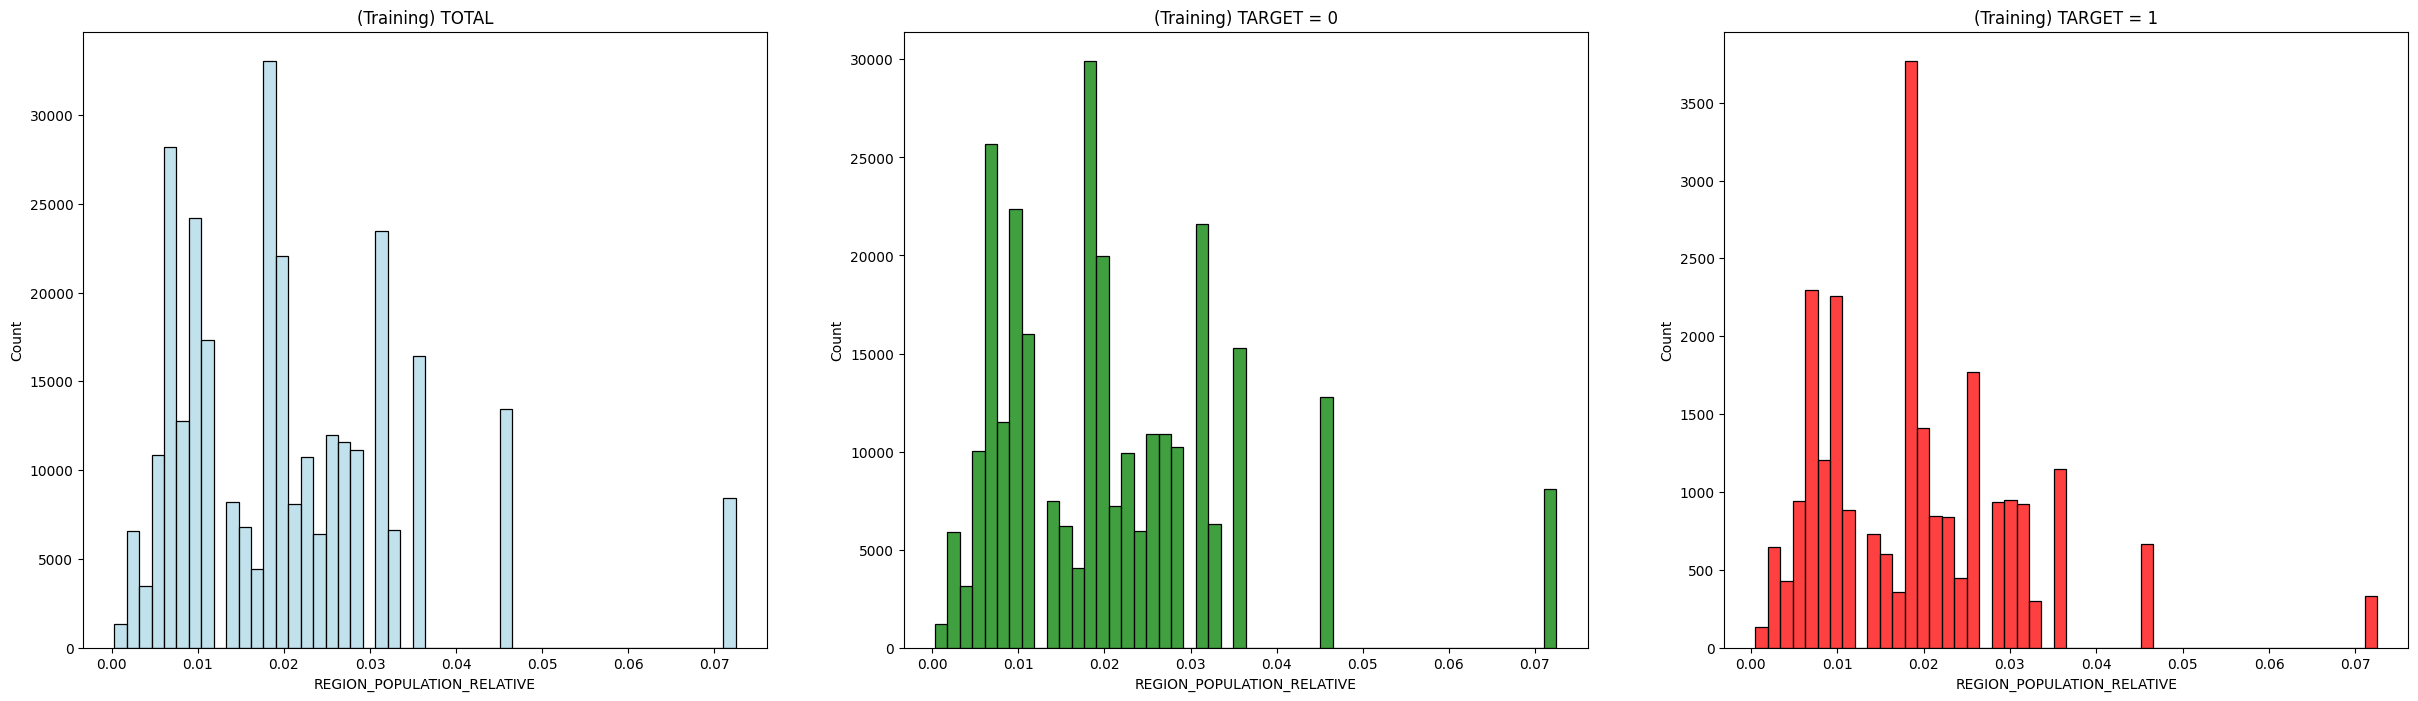

In [43]:
i = 0
fig, ax = plt.subplots(1, 3, figsize=(30, 8))

for ds in df_list:
    i += 1
    plt.subplot(1, 3, i)

    if i==1:
        color = 'lightblue'
        plt.title('(Training) TOTAL')
    elif i==2:
        color = 'green'
        plt.title('(Training) TARGET = 0')
    else:
        color = 'red'
        plt.title('(Training) TARGET = 1')

    sns.histplot(ds['REGION_POPULATION_RELATIVE'], bins=50, color=color)

training['REGION_POPULATION_RELATIVE'].sort_values(ascending=False)

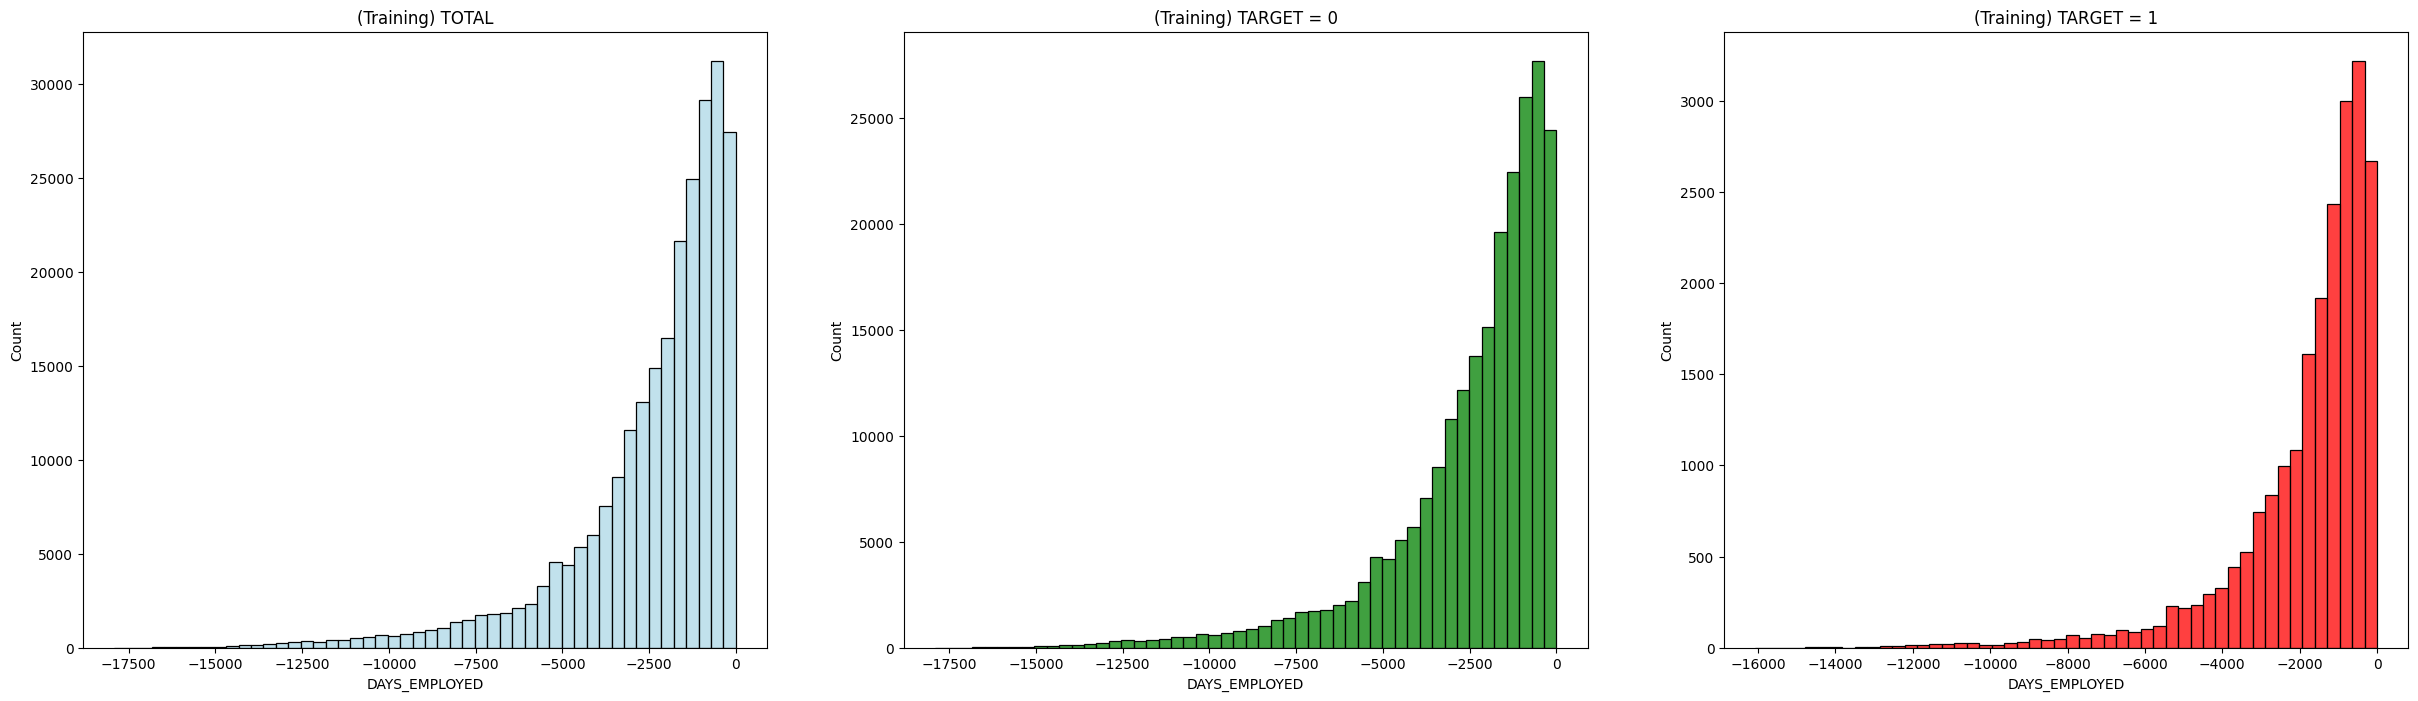

In [44]:
i = 0
fig, ax = plt.subplots(1, 3, figsize=(30, 8))

for ds in df_list:
    i += 1
    plt.subplot(1, 3, i)

    if i==1:
        color = 'lightblue'
        plt.title('(Training) TOTAL')
    elif i==2:
        color = 'green'
        plt.title('(Training) TARGET = 0')
    else:
        color = 'red'
        plt.title('(Training) TARGET = 1')

    sns.histplot(ds['DAYS_EMPLOYED'], bins=50, color=color)


In [45]:
display(HTML(scroll_stats_cat))

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
FLAG_MOBIL,307511,2,1,307510


In [46]:
def show_bar_value(ax):
    for plot in ax.containers:
        labels = []
        for bar in plot:
            labels.append(f'{bar.get_height():.0f}')
        ax.bar_label(plot, labels=labels, label_type='edge')

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64


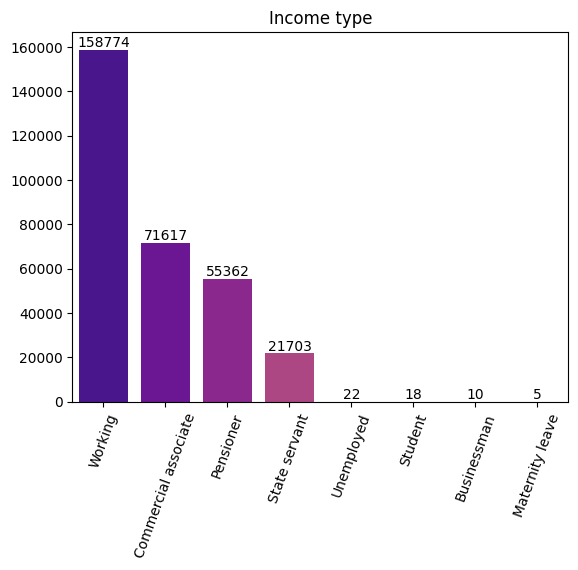

In [47]:
fig, ax = plt.subplots()

income_type = training['NAME_INCOME_TYPE'].value_counts()
print(income_type)

x_bar = income_type.index
y_bar = income_type.values

income_type_plot = sns.barplot(x=x_bar, y=y_bar, hue=x_bar, palette='plasma', ax=ax)

show_bar_value(ax)
ax.set_xlabel("")
plt.xticks(rotation=70)
plt.title('Income type')
plt.show()

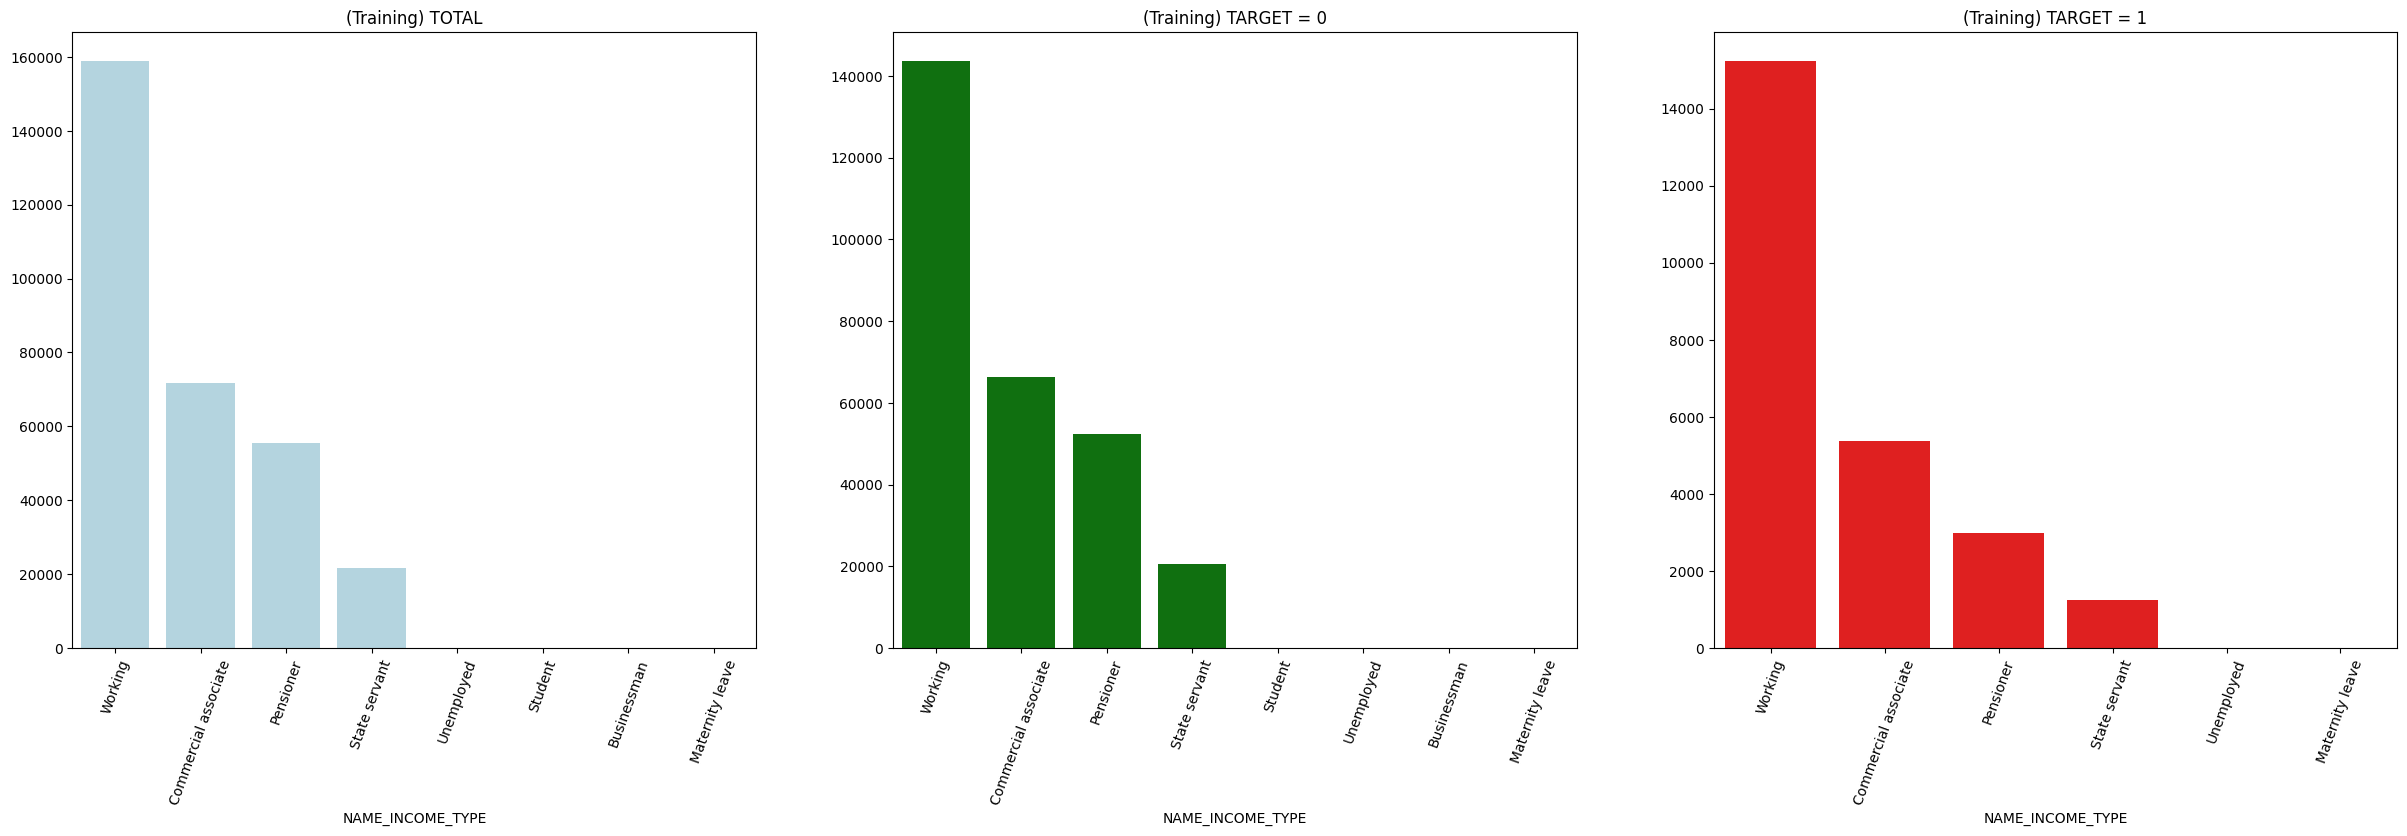

In [48]:
i = 0
fig, ax = plt.subplots(1, 3, figsize=(30, 8))

for ds in df_list:
    i += 1
    plt.subplot(1, 3, i)

    income_type = ds['NAME_INCOME_TYPE'].value_counts()

    x_bar = income_type.index
    y_bar = income_type.values

    if i==1:
        color = 'lightblue'
        plt.title('(Training) TOTAL')
    elif i==2:
        color = 'green'
        plt.title('(Training) TARGET = 0')
    else:
        color = 'red'
        plt.title('(Training) TARGET = 1')

    sns.barplot(x=x_bar, y=y_bar, color=color)
    plt.xticks(rotation=70)

plt.show()

# For those who have difficuties (TARGET = 1), there are no "Businessman" and no "Student"


                TARGET    DAYS_BIRTH  YEARS_BIRTH
YEARS_BINNED                                     
(20.0, 25.0]  0.123036  -8532.795625    23.377522
(25.0, 30.0]  0.111436 -10155.219250    27.822518
(30.0, 35.0]  0.102814 -11854.848377    32.479037
(35.0, 40.0]  0.089414 -13707.908253    37.555913
(40.0, 45.0]  0.078491 -15497.661233    42.459346
(45.0, 50.0]  0.074171 -17323.900441    47.462741
(50.0, 55.0]  0.066968 -19196.494791    52.593136
(55.0, 60.0]  0.055314 -20984.262742    57.491131
(60.0, 65.0]  0.052737 -22780.547460    62.412459
(65.0, 70.0]  0.037270 -24292.614340    66.555108


C:\Users\hangu\AppData\Local\Temp\ipykernel_18108\4041633291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / -365
C:\Users\hangu\AppData\Local\Temp\ipykernel_18108\4041633291.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins=np.linspace(20, 70, 11))
C:\Users\hangu\AppData\Local\Temp\ipykernel_18108\4041633291.py:7: FutureWarning: The default of observed=False is deprecated and will be cha

Text(0, 0.5, 'Failure to Repay (%)')

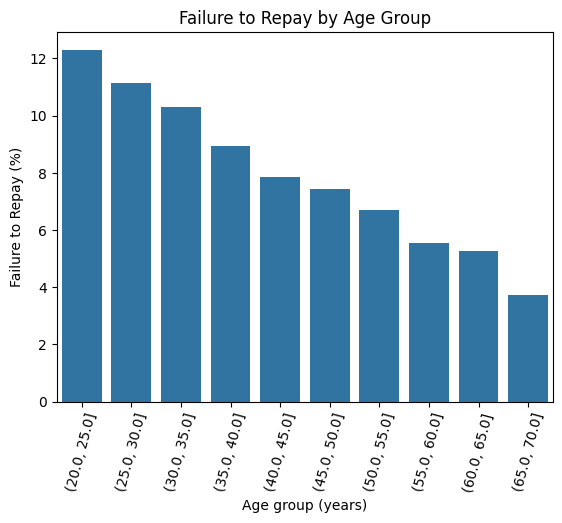

In [49]:
# Plot "Failure to Repay by Age Group" [22]
age_data = training[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / -365

age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins=np.linspace(20, 70, 11))

age_groups = age_data.groupby('YEARS_BINNED').mean()
print(age_groups)

fig, ax = plt.subplots()
sns.barplot(x=age_groups.index.astype(str), y=age_groups['TARGET']*100)
ax.set_title('Failure to Repay by Age Group')
plt.xticks(rotation=75)
plt.xlabel('Age group (years)')
plt.ylabel('Failure to Repay (%)')

<Axes: >

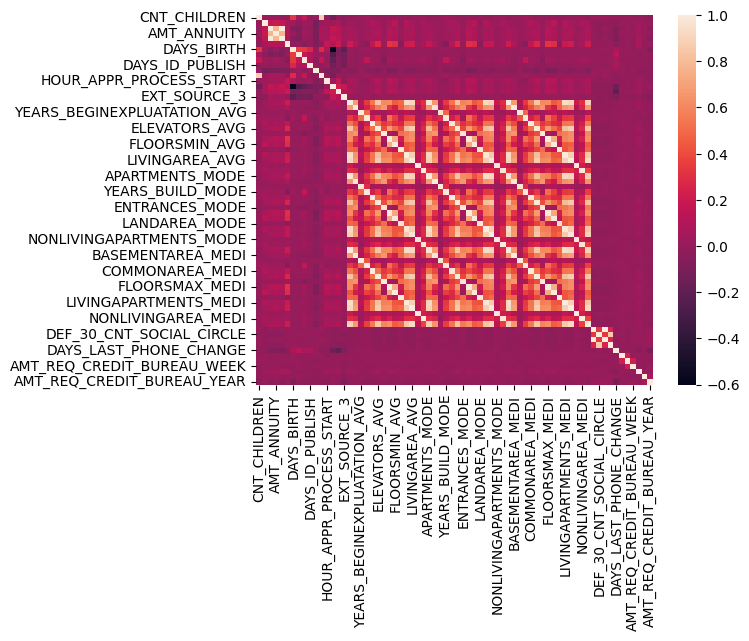

In [50]:
sns.heatmap(df_num.corr())

In [51]:
excl_lrg_missing_training.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
    

In [52]:
# FEATURE ENGINEERING:

# Let's start with excl_lrg_missing_training/excl_lrg_missing_testing:

for ds in tqdm([excl_lrg_missing_training, excl_lrg_missing_testing]):
    # EXT_SROUCE
    ds['EXT_SOURCE_MEAN'] = ds[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
    ds['EXT_SOURCE_STD'] = ds[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
    ds['EXT_SOURCE_STD'] = ds['EXT_SOURCE_STD'].fillna(ds['EXT_SOURCE_STD'].mean())

    # AMT_CREDIT
    ds['ANNUITY_CREDIT_RATIO'] = ds['AMT_ANNUITY']/ds['AMT_CREDIT']
    ds['GOODS_CREDIT_RATIO'] = ds['AMT_GOODS_PRICE']/ds['AMT_CREDIT']

    # AMT_INCOME_TOTAL
    ds['ANNUITY_INCOME_RATIO'] = ds['AMT_ANNUITY']/ds['AMT_INCOME_TOTAL']
    ds['CREDIT_INCOME_RATIO'] = ds['AMT_CREDIT']/ds['AMT_INCOME_TOTAL']
    ds['GOODS_INCOME_RATIO'] = ds['AMT_GOODS_PRICE']/ds['AMT_INCOME_TOTAL']
    ds['CNT_FAM_INCOME_RATIO'] = ds['AMT_INCOME_TOTAL']/ds['CNT_FAM_MEMBERS']

    # DAYS_BIRTH, DAYS_EMPLOYED
    ds['EMPLOYED_BIRTH_RATIO'] = ds['DAYS_EMPLOYED']/ds['DAYS_BIRTH']
    #ds['INCOME_EMPLOYED_RATIO'] = ds['AMT_INCOME_TOTAL']/ds['DAYS_EMPLOYED']
    ds['INCOME_BIRTH_RATIO'] = ds['AMT_INCOME_TOTAL']/ds['DAYS_BIRTH']
    ds['CAR_BIRTH_RATIO'] = ds['OWN_CAR_AGE']/ds['DAYS_BIRTH']
    ds['CAR_EMPLOYED_RATIO'] = ds['OWN_CAR_AGE']/ds['DAYS_EMPLOYED']   

  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00, 10.70it/s]


In [53]:
unique_max_train = []
for col in df_num.columns:
    train_count = df_num[col].value_counts()
    unique_max_train.append([col, train_count.max(), train_count.idxmax()])

unique_max_train = pd.DataFrame(unique_max_train, columns=['Variable', 'Max duplicate times', 'Max duplicate value']).sort_values(by='Max duplicate times', ascending=False)
scroll_unique_max_train = create_scrollable_table(unique_max_train, 'unique_max_train', 'Duplicate values (training)')
display(HTML(scroll_unique_max_train))


,Variable,Max duplicate times,Max duplicate value
62,DEF_60_CNT_SOCIAL_CIRCLE,280721,0.000000
60,DEF_30_CNT_SOCIAL_CIRCLE,271324,0.000000
65,AMT_REQ_CREDIT_BUREAU_DAY,264503,0.000000
64,AMT_REQ_CREDIT_BUREAU_HOUR,264366,0.000000
66,AMT_REQ_CREDIT_BUREAU_WEEK,257456,0.000000
67,AMT_REQ_CREDIT_BUREAU_MON,222233,0.000000
68,AMT_REQ_CREDIT_BUREAU_QRT,215417,0.000000
0,CNT_CHILDREN,215371,0.000000
61,OBS_60_CNT_SOCIAL_CIRCLE,164666,0.000000
59,OBS_30_CNT_SOCIAL_CIRCLE,163910,0.000000


In [54]:
# Seems like DAYS_EMPLOYED, AMT_INCOME_TOTAL, AMT_GOODS_PRICE have repeated values, let's check their uniqueness:

for col in ['DAYS_EMPLOYED', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE']:
    train_count = excl_lrg_missing_training[col].value_counts()
    uniques_trn = train_count.index[train_count == 1]
    excl_lrg_missing_training[col+"_u"] = excl_lrg_missing_training[col].isin(uniques_trn).astype(int)

    test_count = excl_lrg_missing_testing[col].value_counts()
    uniques_tst = test_count.index[test_count == 1]
    excl_lrg_missing_testing[col+"_u"] = excl_lrg_missing_testing[col].isin(uniques_tst).astype(int)

#Check all rows, look for those that have at least one unique values:

cols = ['DAYS_EMPLOYED', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE']
excl_lrg_missing_training['has_unique'] = excl_lrg_missing_training[[col+"_u" for col in cols]].any(axis=1)
excl_lrg_missing_testing['has_unique'] = excl_lrg_missing_testing[[col+"_u" for col in cols]].any(axis=1)

for ds in tqdm([excl_lrg_missing_training, excl_lrg_missing_testing]):
    ds.loc[ds['has_unique']==False, [col+"_u" for col in cols]] = np.NaN
    ds.drop(['has_unique'], axis = 1, inplace=True)

for col in tqdm([col+"_u" for col in cols]):
    excl_lrg_missing_training[col] = excl_lrg_missing_training[col].astype(str)
    excl_lrg_missing_testing[col] = excl_lrg_missing_testing[col].astype(str)

100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


In [55]:
# FEATURE ENGINEERING:

# Now it's "bureau" turn:

# SK_BUREAU_ID: unique in this "bureau" df
# DAYS_CREDIT: How many days before current application did client apply for Credit Bureau credit
# CREDIT_DAY_OVERDUE: Number of days past due on CB credit at the time of application for related loan in our sample
# DAYS_CREDIT_ENDDATE: Remaining duration of CB credit (in days) at the time of application in Home Credit
# DAYS_CREDIT_UPDATE: How many days before loan application did last information about the Credit Bureau credit come

bureau['bur_ENDDATE_FACT_DIFF'] = bureau['DAYS_CREDIT_ENDDATE'] - bureau['DAYS_ENDDATE_FACT']
bureau['bur_CREDIT_FACT_DIFF'] = bureau['DAYS_CREDIT'] - bureau['DAYS_ENDDATE_FACT']
bureau['bur_CREDIT_ENDDATE_DIFF'] = bureau['DAYS_CREDIT'] - bureau['DAYS_CREDIT_ENDDATE']

bureau['bur_CREDIT_DEBT_RATIO'] = bureau['AMT_CREDIT_SUM_DEBT'] / bureau['AMT_CREDIT_SUM']
bureau['bur_CREDIT_DEBT_DIFF'] = bureau['AMT_CREDIT_SUM_DEBT'] - bureau['AMT_CREDIT_SUM']

bureau['bur_IS_DPD'] = bureau['CREDIT_DAY_OVERDUE'].apply(lambda x: 1 if x>0 else 0)
bureau['bur_IS_DPD_OVER120'] = bureau['CREDIT_DAY_OVERDUE'].apply(lambda x: 1 if x>120 else 0)

In [56]:
print(bureau['CREDIT_ACTIVE'].value_counts(), "\n")

bureau_bd_sld = bureau[(bureau['CREDIT_ACTIVE']=='Bad debt') | (bureau['CREDIT_ACTIVE']=='Sold')]
bureau_bd_sld_ID = bureau_bd_sld['SK_ID_CURR'].unique()

print(len(bureau_bd_sld_ID))
bureau_bd_sld_ID

CREDIT_ACTIVE
Closed      657173
Active      387403
Sold          3987
Bad debt        12
Name: count, dtype: int64 

3740


array([161678, 147546, 113548, ..., 200493, 256044, 131518], dtype=int64)

In [57]:
training_bd_sld_ID = common_elements(bureau_bd_sld_ID, ID_CURR_train)
testing_bd_sld_ID = common_elements(bureau_bd_sld_ID, ID_CURR_test)

print(len(training_bd_sld_ID))
print(len(testing_bd_sld_ID))

3241
499


In [58]:
# For IDs with sold/bad_debt status in "bureau", flag 1, otherwise, flag 0:

excl_lrg_missing_training.loc[excl_lrg_missing_training['SK_ID_CURR'].isin(training_bd_sld_ID), 'bur_Sold_Bad_debt'] = '1'
excl_lrg_missing_training.loc[~excl_lrg_missing_training['SK_ID_CURR'].isin(training_bd_sld_ID), 'bur_Sold_Bad_debt'] = '0'
excl_lrg_missing_training['bur_Sold_Bad_debt'] = excl_lrg_missing_training['bur_Sold_Bad_debt'].astype(object)


excl_lrg_missing_testing.loc[excl_lrg_missing_testing['SK_ID_CURR'].isin(testing_bd_sld_ID), 'bur_Sold_Bad_debt'] = '1'
excl_lrg_missing_testing.loc[~excl_lrg_missing_testing['SK_ID_CURR'].isin(testing_bd_sld_ID), 'bur_Sold_Bad_debt'] = '0'
excl_lrg_missing_testing['bur_Sold_Bad_debt'] = excl_lrg_missing_testing['bur_Sold_Bad_debt'].astype(object)

In [59]:
bureau_agg_dict = {
    'SK_ID_BUREAU':['count'],
    'DAYS_CREDIT':['min', 'max', 'mean'],
    'CREDIT_DAY_OVERDUE':['min', 'max', 'mean'],
    'DAYS_CREDIT_ENDDATE':['min', 'max', 'mean'],
    'DAYS_ENDDATE_FACT':['min', 'max', 'mean'],
    'AMT_CREDIT_MAX_OVERDUE': ['max', 'mean'],
    'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_OVERDUE': ['max', 'mean', 'sum'],
    'AMT_ANNUITY': ['max', 'mean', 'sum'],

    'bur_ENDDATE_FACT_DIFF':['min', 'max', 'mean'],
    'bur_CREDIT_FACT_DIFF':['min', 'max', 'mean'],
    'bur_CREDIT_ENDDATE_DIFF':['min', 'max', 'mean'],
    #'bur_CREDIT_DEBT_RATIO':['min', 'max', 'mean'],
    'bur_CREDIT_DEBT_DIFF':['min', 'max', 'mean'],
    'bur_IS_DPD':['mean', 'sum'],
    'bur_IS_DPD_OVER120':['mean', 'sum']
}

bureau_grp = bureau.groupby('SK_ID_CURR')
bureau_day_amt_agg = bureau_grp.agg(bureau_agg_dict)
bureau_day_amt_agg.columns = ['bur_' + '_'.join(col).upper() for col in bureau_day_amt_agg.columns.ravel()]
bureau_day_amt_agg = bureau_day_amt_agg.reset_index()

print(bureau_day_amt_agg.columns)

excl_lrg_missing_training = excl_lrg_missing_training.merge(bureau_day_amt_agg, on='SK_ID_CURR', how='left')
excl_lrg_missing_testing = excl_lrg_missing_testing.merge(bureau_day_amt_agg, on='SK_ID_CURR', how='left')

# Now both training and testing have all columns in "bureau_day_amt_agg"

Index(['SK_ID_CURR', 'bur_SK_ID_BUREAU_COUNT', 'bur_DAYS_CREDIT_MIN',
       'bur_DAYS_CREDIT_MAX', 'bur_DAYS_CREDIT_MEAN',
       'bur_CREDIT_DAY_OVERDUE_MIN', 'bur_CREDIT_DAY_OVERDUE_MAX',
       'bur_CREDIT_DAY_OVERDUE_MEAN', 'bur_DAYS_CREDIT_ENDDATE_MIN',
       'bur_DAYS_CREDIT_ENDDATE_MAX', 'bur_DAYS_CREDIT_ENDDATE_MEAN',
       'bur_DAYS_ENDDATE_FACT_MIN', 'bur_DAYS_ENDDATE_FACT_MAX',
       'bur_DAYS_ENDDATE_FACT_MEAN', 'bur_AMT_CREDIT_MAX_OVERDUE_MAX',
       'bur_AMT_CREDIT_MAX_OVERDUE_MEAN', 'bur_AMT_CREDIT_SUM_MAX',
       'bur_AMT_CREDIT_SUM_MEAN', 'bur_AMT_CREDIT_SUM_SUM',
       'bur_AMT_CREDIT_SUM_DEBT_MAX', 'bur_AMT_CREDIT_SUM_DEBT_MEAN',
       'bur_AMT_CREDIT_SUM_DEBT_SUM', 'bur_AMT_CREDIT_SUM_OVERDUE_MAX',
       'bur_AMT_CREDIT_SUM_OVERDUE_MEAN', 'bur_AMT_CREDIT_SUM_OVERDUE_SUM',
       'bur_AMT_ANNUITY_MAX', 'bur_AMT_ANNUITY_MEAN', 'bur_AMT_ANNUITY_SUM',
       'bur_BUR_ENDDATE_FACT_DIFF_MIN', 'bur_BUR_ENDDATE_FACT_DIFF_MAX',
       'bur_BUR_ENDDATE_FACT_DIFF_MEAN

In [60]:
bureau_days750_group = bureau[bureau['DAYS_CREDIT'].abs() < 750].groupby('SK_ID_CURR')
bureau_days750_agg = bureau_days750_group.agg(bureau_agg_dict)
bureau_days750_agg.columns = ['bur_750_' + '_'.join(col).upper() for col in bureau_days750_agg.columns.ravel()]
bureau_days750_agg = bureau_days750_agg.reset_index()

print(bureau_days750_agg.columns)

excl_lrg_missing_training = excl_lrg_missing_training.merge(bureau_day_amt_agg, on='SK_ID_CURR', how='left')
excl_lrg_missing_testing = excl_lrg_missing_testing.merge(bureau_day_amt_agg, on='SK_ID_CURR', how='left')

# Now both training and testing have all columns in "bureau_days750_agg"

Index(['SK_ID_CURR', 'bur_750_SK_ID_BUREAU_COUNT', 'bur_750_DAYS_CREDIT_MIN',
       'bur_750_DAYS_CREDIT_MAX', 'bur_750_DAYS_CREDIT_MEAN',
       'bur_750_CREDIT_DAY_OVERDUE_MIN', 'bur_750_CREDIT_DAY_OVERDUE_MAX',
       'bur_750_CREDIT_DAY_OVERDUE_MEAN', 'bur_750_DAYS_CREDIT_ENDDATE_MIN',
       'bur_750_DAYS_CREDIT_ENDDATE_MAX', 'bur_750_DAYS_CREDIT_ENDDATE_MEAN',
       'bur_750_DAYS_ENDDATE_FACT_MIN', 'bur_750_DAYS_ENDDATE_FACT_MAX',
       'bur_750_DAYS_ENDDATE_FACT_MEAN', 'bur_750_AMT_CREDIT_MAX_OVERDUE_MAX',
       'bur_750_AMT_CREDIT_MAX_OVERDUE_MEAN', 'bur_750_AMT_CREDIT_SUM_MAX',
       'bur_750_AMT_CREDIT_SUM_MEAN', 'bur_750_AMT_CREDIT_SUM_SUM',
       'bur_750_AMT_CREDIT_SUM_DEBT_MAX', 'bur_750_AMT_CREDIT_SUM_DEBT_MEAN',
       'bur_750_AMT_CREDIT_SUM_DEBT_SUM', 'bur_750_AMT_CREDIT_SUM_OVERDUE_MAX',
       'bur_750_AMT_CREDIT_SUM_OVERDUE_MEAN',
       'bur_750_AMT_CREDIT_SUM_OVERDUE_SUM', 'bur_750_AMT_ANNUITY_MAX',
       'bur_750_AMT_ANNUITY_MEAN', 'bur_750_AMT_ANNUITY_SU

In [61]:
bureau_active_group = bureau[bureau['CREDIT_ACTIVE'] == 'Active'].groupby('SK_ID_CURR')
bureau_active_agg = bureau_active_group.agg(bureau_agg_dict)
bureau_active_agg.columns = ['bur_ACT_' + '_'.join(col).upper() for col in bureau_active_agg.columns.ravel()]
bureau_active_agg = bureau_active_agg.reset_index()

print(bureau_active_agg.columns)

excl_lrg_missing_training = excl_lrg_missing_training.merge(bureau_active_agg, on='SK_ID_CURR', how='left')
excl_lrg_missing_testing = excl_lrg_missing_testing.merge(bureau_active_agg, on='SK_ID_CURR', how='left')

# Now both training and testing have all columns in "bureau_active_agg"

Index(['SK_ID_CURR', 'bur_ACT_SK_ID_BUREAU_COUNT', 'bur_ACT_DAYS_CREDIT_MIN',
       'bur_ACT_DAYS_CREDIT_MAX', 'bur_ACT_DAYS_CREDIT_MEAN',
       'bur_ACT_CREDIT_DAY_OVERDUE_MIN', 'bur_ACT_CREDIT_DAY_OVERDUE_MAX',
       'bur_ACT_CREDIT_DAY_OVERDUE_MEAN', 'bur_ACT_DAYS_CREDIT_ENDDATE_MIN',
       'bur_ACT_DAYS_CREDIT_ENDDATE_MAX', 'bur_ACT_DAYS_CREDIT_ENDDATE_MEAN',
       'bur_ACT_DAYS_ENDDATE_FACT_MIN', 'bur_ACT_DAYS_ENDDATE_FACT_MAX',
       'bur_ACT_DAYS_ENDDATE_FACT_MEAN', 'bur_ACT_AMT_CREDIT_MAX_OVERDUE_MAX',
       'bur_ACT_AMT_CREDIT_MAX_OVERDUE_MEAN', 'bur_ACT_AMT_CREDIT_SUM_MAX',
       'bur_ACT_AMT_CREDIT_SUM_MEAN', 'bur_ACT_AMT_CREDIT_SUM_SUM',
       'bur_ACT_AMT_CREDIT_SUM_DEBT_MAX', 'bur_ACT_AMT_CREDIT_SUM_DEBT_MEAN',
       'bur_ACT_AMT_CREDIT_SUM_DEBT_SUM', 'bur_ACT_AMT_CREDIT_SUM_OVERDUE_MAX',
       'bur_ACT_AMT_CREDIT_SUM_OVERDUE_MEAN',
       'bur_ACT_AMT_CREDIT_SUM_OVERDUE_SUM', 'bur_ACT_AMT_ANNUITY_MAX',
       'bur_ACT_AMT_ANNUITY_MEAN', 'bur_ACT_AMT_ANNUITY_SU

In [62]:
# Now it's "bureau_balance" turn:

# MONTHS_BALANCE: Month of balance relative to application date (-1 means the freshest balance date)
# STATUS: Status of Credit Bureau loan during the month (C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,… 5 means DPD 120+ or sold or written off ] )

bureau_balance['STATUS'].value_counts()

STATUS
C    512949
0    293127
X    229076
1      9469
5      2540
2       892
3       312
4       210
Name: count, dtype: int64

In [63]:
# In STATUS, replace "C" by "-1", "X" by np.NaN

bureau_balance.loc[bureau_balance['STATUS'] == 'C', 'STATUS'] = -1
bureau_balance.loc[bureau_balance['STATUS'] == 'X', 'STATUS'] = np.NaN
bureau_balance['STATUS'].value_counts()

STATUS
-1    512949
0     293127
1       9469
5       2540
2        892
3        312
4        210
Name: count, dtype: int64

In [64]:
bureau_balance = bureau_balance.dropna()
bureau_balance['STATUS'] = bureau_balance['STATUS'].astype(str)
bureau_balance_maxST = pd.DataFrame(bureau_balance.groupby('SK_ID_BUREAU')['STATUS'].max())
bureau_balance_maxST

,STATUS
SK_ID_BUREAU,
5001726,0
5001728,0
5001729,0
5001730,0
5001754,0
...,...
6834516,0
6834517,0
6834621,0


In [65]:
bureau_merge = bureau_balance_maxST.merge(bureau, on='SK_ID_BUREAU')
bureau_merge.head()

,SK_ID_BUREAU,STATUS,SK_ID_CURR,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,...,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,bur_ENDDATE_FACT_DIFF,bur_CREDIT_FACT_DIFF,bur_CREDIT_ENDDATE_DIFF,bur_CREDIT_DEBT_RATIO,bur_CREDIT_DEBT_DIFF,bur_IS_DPD,bur_IS_DPD_OVER120
0,5001726,0,314011,Closed,currency 1,-1176,0,-993.0,-993.0,0.0,...,Consumer credit,-987,NaN,0.0,-183.0,-183.0,0.0,-49937.175,0,0
1,5001728,0,267298,Active,currency 1,-12,0,171.0,NaN,0.0,...,Consumer credit,-11,6210.0,NaN,NaN,-183.0,1.0,0.000,0,0
2,5001729,0,267298,Closed,currency 1,-192,0,-8.0,-8.0,0.0,...,Consumer credit,-8,NaN,0.0,-184.0,-184.0,0.0,-42210.000,0,0
3,5001730,0,267298,Closed,currency 1,-1847,0,-1694.0,-1694.0,0.0,...,Consumer credit,-1693,NaN,0.0,-153.0,-153.0,0.0,-38070.000,0,0
4,5001754,0,308565,Active,currency 1,-353,0,-61.0,NaN,NaN,...,Credit card,-309,NaN,NaN,NaN,-292.0,0.0,-225000.000,0,0


In [66]:
bureau_merge_maxST = pd.DataFrame(bureau_merge.groupby('SK_ID_CURR')['STATUS'].max())
bureau_merge_maxST.rename(columns={'STATUS': 'bureau_bal_STATUS'}, inplace=True)
bureau_merge_maxST.head()

,bureau_bal_STATUS
SK_ID_CURR,
100072,1
100107,0
100109,1
100124,0
100312,1


In [67]:
excl_lrg_missing_training = excl_lrg_missing_training.merge(bureau_merge_maxST, on='SK_ID_CURR', how='left')
excl_lrg_missing_testing = excl_lrg_missing_testing.merge(bureau_merge_maxST, on='SK_ID_CURR', how='left')

excl_lrg_missing_training['bureau_bal_STATUS'] = excl_lrg_missing_training['bureau_bal_STATUS'].astype(str)
excl_lrg_missing_testing['bureau_bal_STATUS'] = excl_lrg_missing_testing['bureau_bal_STATUS'].astype(str)

# Now both training and testing have column "bureau_bal_STATUS"

In [68]:
bureau[['SK_ID_CURR', 'SK_ID_BUREAU']]

,SK_ID_CURR,SK_ID_BUREAU
0,215354,5714462
1,215354,5714463
2,215354,5714464
3,215354,5714465
4,215354,5714466
...,...,...
1048570,138615,6745057
1048571,369065,6745058
1048572,369065,6745059
1048573,369065,6745060


In [69]:
# Merge "bureau_balance" with "bureau"'s SK_ID_CURR:
bureau_balance = bureau_balance.merge(bureau[['SK_ID_CURR', 'SK_ID_BUREAU']], on='SK_ID_BUREAU', how='left')
bureau_balance.rename(columns={'SK_ID_CURR_x': 'SK_ID_CURR_x'}, inplace=True)


# IS_DPD
bureau_balance['IS_DPD'] = bureau_balance['STATUS'].apply(lambda x: 1 if x in ['1', '2', '3', '4', '5'] else 0)
bureau_balance['IS_DPD_OVER120'] = bureau_balance['STATUS'].apply(lambda x: 1 if x == '5' else 0)

bureau_balance_agg_dict = {
    'SK_ID_CURR':['count'],
    'MONTHS_BALANCE':['min', 'max', 'mean'],
    'IS_DPD':['mean', 'sum'],
    'IS_DPD_OVER120':['mean', 'sum']
}

bureau_balance_grp = bureau_balance.groupby('SK_ID_CURR')
bureau_balance_agg = bureau_balance_grp.agg(bureau_balance_agg_dict)
bureau_balance_agg.columns = ['bur_bal_' + '_'.join(x).upper() for x in bureau_balance_agg.columns.ravel()]
bureau_balance_agg = bureau_balance_agg.reset_index()

print(bureau_balance_agg.columns)

excl_lrg_missing_training = excl_lrg_missing_training.merge(bureau_balance_agg, on='SK_ID_CURR', how='left')
excl_lrg_missing_testing = excl_lrg_missing_testing.merge(bureau_balance_agg, on='SK_ID_CURR', how='left')

# Now both training and testing have all columns in "bureau_balance_agg"

Index(['SK_ID_CURR', 'bur_bal_SK_ID_CURR_COUNT', 'bur_bal_MONTHS_BALANCE_MIN',
       'bur_bal_MONTHS_BALANCE_MAX', 'bur_bal_MONTHS_BALANCE_MEAN',
       'bur_bal_IS_DPD_MEAN', 'bur_bal_IS_DPD_SUM',
       'bur_bal_IS_DPD_OVER120_MEAN', 'bur_bal_IS_DPD_OVER120_SUM'],
      dtype='object')


In [70]:
# Now it's "POS_CASH" turn:

# SK_ID_PREV: ID of previous credit in Home Credit
# CNT_INSTALMENT: Term of previous credit (can change over time)
# SK_DPD: DPD (days past due) during the month of previous credit

POS_CASH.loc[POS_CASH['NAME_CONTRACT_STATUS']=='Active', 'pos_STATUS'] = 1
POS_CASH.loc[POS_CASH['NAME_CONTRACT_STATUS']=='Completed', 'pos_STATUS'] = 0
POS_CASH.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,pos_STATUS
0,1803195,182943,-31,48.0,45.0,Active,0,0,1.0
1,1715348,367990,-33,36.0,35.0,Active,0,0,1.0
2,1784872,397406,-32,12.0,9.0,Active,0,0,1.0
3,1903291,269225,-35,48.0,42.0,Active,0,0,1.0
4,2341044,334279,-35,36.0,35.0,Active,0,0,1.0


In [71]:
POS_CASH_ST_df = pd.DataFrame(POS_CASH.groupby('SK_ID_CURR')['pos_STATUS'].max())
POS_CASH_ST_df.head()

,pos_STATUS
SK_ID_CURR,
100001,1.0
100002,1.0
100003,1.0
100004,1.0
100005,1.0


In [72]:
excl_lrg_missing_training = excl_lrg_missing_training.merge(POS_CASH_ST_df, on='SK_ID_CURR', how='left')
excl_lrg_missing_testing = excl_lrg_missing_testing.merge(POS_CASH_ST_df, on='SK_ID_CURR', how='left')

excl_lrg_missing_training['pos_STATUS'] = excl_lrg_missing_training['pos_STATUS'].astype(str)
excl_lrg_missing_testing['pos_STATUS'] = excl_lrg_missing_testing['pos_STATUS'].astype(str)

# Now both training and testing have column "pos_STATUS"

In [73]:
POS_CASH_INST = pd.DataFrame(POS_CASH.groupby('SK_ID_CURR')['CNT_INSTALMENT_FUTURE'].mean())
POS_CASH_INST.rename(columns={'CNT_INSTALMENT_FUTURE': 'pos_INST'}, inplace=True)
POS_CASH_INST.head()

,pos_INST
SK_ID_CURR,
100001,1.444444
100002,15.000000
100003,5.785714
100004,2.250000
100005,7.200000


In [74]:
excl_lrg_missing_training = excl_lrg_missing_training.merge(POS_CASH_INST, on='SK_ID_CURR', how='left')
excl_lrg_missing_testing = excl_lrg_missing_testing.merge(POS_CASH_INST, on='SK_ID_CURR', how='left')

# Now both training and testing have column "pos_INST"

In [75]:
POS_CASH_DPD = pd.DataFrame(POS_CASH.groupby('SK_ID_CURR')['SK_DPD'].mean())
POS_CASH_DPD.rename(columns={'SK_DPD': 'pos_DPD'}, inplace=True)
POS_CASH_DPD.head()

,pos_DPD
SK_ID_CURR,
100001,0.777778
100002,0.000000
100003,0.000000
100004,0.000000
100005,0.000000


In [76]:
excl_lrg_missing_training = excl_lrg_missing_training.merge(POS_CASH_DPD, on='SK_ID_CURR', how='left')
excl_lrg_missing_testing = excl_lrg_missing_testing.merge(POS_CASH_DPD, on='SK_ID_CURR', how='left')

# Now both training and testing have column "pos_DPD"

In [77]:
POS_CASH['pos_IS_DPD'] = POS_CASH['SK_DPD'].apply(lambda x: 1 if (x>0) else 0)
POS_CASH['pos_IS_DPD_UNDER_120'] = POS_CASH['SK_DPD'].apply(lambda x: 1 if (x>=0)&(x<120) else 0)
POS_CASH['pos_IS_DPD_OVER_120'] = POS_CASH['SK_DPD'].apply(lambda x: 1 if (x>=120) else 0)

pos_bal_agg_dict = {
    'SK_ID_CURR':['count'], 
    'MONTHS_BALANCE':['min', 'mean', 'max'], 
    'SK_DPD':['min', 'max', 'mean', 'sum'],
    'CNT_INSTALMENT':['min', 'max', 'mean', 'sum'],
    'CNT_INSTALMENT_FUTURE':['min', 'max', 'mean', 'sum'],

    'pos_IS_DPD':['mean', 'sum'],   
    'pos_IS_DPD_UNDER_120':['mean', 'sum'],
    'pos_IS_DPD_OVER_120':['mean', 'sum']
}

pos_bal_grp = POS_CASH.groupby('SK_ID_CURR')
pos_bal_agg = pos_bal_grp.agg(pos_bal_agg_dict)
pos_bal_agg.columns = ['pos_' + '_'.join(col).upper() for col in pos_bal_agg.columns.ravel()]


print(pos_bal_agg.columns)

excl_lrg_missing_training = excl_lrg_missing_training.merge(pos_bal_agg, on='SK_ID_CURR', how='left')
excl_lrg_missing_testing = excl_lrg_missing_testing.merge(pos_bal_agg, on='SK_ID_CURR', how='left')

# Now both training and testing have all columns in "pos_bal_agg"


Index(['pos_SK_ID_CURR_COUNT', 'pos_MONTHS_BALANCE_MIN',
       'pos_MONTHS_BALANCE_MEAN', 'pos_MONTHS_BALANCE_MAX', 'pos_SK_DPD_MIN',
       'pos_SK_DPD_MAX', 'pos_SK_DPD_MEAN', 'pos_SK_DPD_SUM',
       'pos_CNT_INSTALMENT_MIN', 'pos_CNT_INSTALMENT_MAX',
       'pos_CNT_INSTALMENT_MEAN', 'pos_CNT_INSTALMENT_SUM',
       'pos_CNT_INSTALMENT_FUTURE_MIN', 'pos_CNT_INSTALMENT_FUTURE_MAX',
       'pos_CNT_INSTALMENT_FUTURE_MEAN', 'pos_CNT_INSTALMENT_FUTURE_SUM',
       'pos_POS_IS_DPD_MEAN', 'pos_POS_IS_DPD_SUM',
       'pos_POS_IS_DPD_UNDER_120_MEAN', 'pos_POS_IS_DPD_UNDER_120_SUM',
       'pos_POS_IS_DPD_OVER_120_MEAN', 'pos_POS_IS_DPD_OVER_120_SUM'],
      dtype='object')


In [78]:
pos_bal_m20_grp = POS_CASH[POS_CASH['MONTHS_BALANCE'].abs() < 20].groupby('SK_ID_CURR')
pos_bal_m20_agg = pos_bal_m20_grp.agg(pos_bal_agg_dict)
pos_bal_m20_agg.columns = ['pos_M20_' + '_'.join(col).upper() for col in pos_bal_m20_agg.columns.ravel()]

print(pos_bal_m20_agg.columns)

excl_lrg_missing_training = excl_lrg_missing_training.merge(pos_bal_m20_agg, on='SK_ID_CURR', how='left')
excl_lrg_missing_testing = excl_lrg_missing_testing.merge(pos_bal_m20_agg, on='SK_ID_CURR', how='left')

# Now both training and testing have all columns in "pos_bal_m20_agg"


Index(['pos_M20_SK_ID_CURR_COUNT', 'pos_M20_MONTHS_BALANCE_MIN',
       'pos_M20_MONTHS_BALANCE_MEAN', 'pos_M20_MONTHS_BALANCE_MAX',
       'pos_M20_SK_DPD_MIN', 'pos_M20_SK_DPD_MAX', 'pos_M20_SK_DPD_MEAN',
       'pos_M20_SK_DPD_SUM', 'pos_M20_CNT_INSTALMENT_MIN',
       'pos_M20_CNT_INSTALMENT_MAX', 'pos_M20_CNT_INSTALMENT_MEAN',
       'pos_M20_CNT_INSTALMENT_SUM', 'pos_M20_CNT_INSTALMENT_FUTURE_MIN',
       'pos_M20_CNT_INSTALMENT_FUTURE_MAX',
       'pos_M20_CNT_INSTALMENT_FUTURE_MEAN',
       'pos_M20_CNT_INSTALMENT_FUTURE_SUM', 'pos_M20_POS_IS_DPD_MEAN',
       'pos_M20_POS_IS_DPD_SUM', 'pos_M20_POS_IS_DPD_UNDER_120_MEAN',
       'pos_M20_POS_IS_DPD_UNDER_120_SUM', 'pos_M20_POS_IS_DPD_OVER_120_MEAN',
       'pos_M20_POS_IS_DPD_OVER_120_SUM'],
      dtype='object')


In [79]:
# Now it's "credit_card" turn:

# AMT_BALANCE: Balance during the month of previous credit
# AMT_CREDIT_LIMIT_ACTUAL: Credit card limit during the month of the previous credit
# AMT_DRAWINGS_ATM_CURRENT: Amount drawing at ATM during the month of the previous credit
# AMT_DRAWINGS_CURRENT: Amount drawing during the month of the previous credit
# AMT_PAYMENT_CURRENT: How much did the client pay during the month on the previous credit
# CNT_DRAWINGS_ATM_CURRENT: Number of drawings at ATM during this month on the previous credit+

credit_card['BALANCE_LIMIT_RATIO'] = credit_card['AMT_BALANCE'] / credit_card['AMT_CREDIT_LIMIT_ACTUAL']
credit_card['DRAWING_LIMIT_RATIO'] = credit_card['AMT_DRAWINGS_CURRENT'] / credit_card['AMT_CREDIT_LIMIT_ACTUAL']

# DPD
credit_card['IS_DPD'] = credit_card['SK_DPD'].apply(lambda x: 1 if x>0 else 0)
credit_card['IS_DPD_UNDER_120'] = credit_card['SK_DPD'].apply(lambda x: 1 if (x>0)&(x<120) else 0)
credit_card['IS_DPD_OVER_120'] = credit_card['SK_DPD'].apply(lambda x: 1 if x>=120 else 0)


# "NAME_CONTRACT_STATUS": Active=1, Completed=0
# Sum of "AMT_CREDIT_LIMIT_ACTUAL"
# Mean of "AMT_DRAWINGS_CURRENT"
# Mean of "CNT_DRAWINGS_CURRENT"
# Mean of "SK_DPD"

credit_card.loc[credit_card['NAME_CONTRACT_STATUS']=='Active', 'credit_STATUS'] = 1
credit_card.loc[credit_card['NAME_CONTRACT_STATUS']=='Completed', 'credit_STATUS'] = 0
credit_ST_df = pd.DataFrame(credit_card.groupby('SK_ID_CURR')['credit_STATUS'].max())

excl_lrg_missing_training = excl_lrg_missing_training.merge(credit_ST_df, on='SK_ID_CURR', how='left')
excl_lrg_missing_testing = excl_lrg_missing_testing.merge(credit_ST_df, on='SK_ID_CURR', how='left')

excl_lrg_missing_training['credit_STATUS'] = excl_lrg_missing_training['credit_STATUS'].astype(str)
excl_lrg_missing_testing['credit_STATUS'] = excl_lrg_missing_testing['credit_STATUS'].astype(str)

# Now both training and testing have column "credit_STATUS"

In [80]:
credit_limit = pd.DataFrame(credit_card.groupby('SK_ID_CURR')['AMT_CREDIT_LIMIT_ACTUAL'].sum())
credit_limit.rename(columns={'AMT_CREDIT_LIMIT_ACTUAL': 'credit_LIMIT'}, inplace=True)

excl_lrg_missing_training = excl_lrg_missing_training.merge(credit_limit, on='SK_ID_CURR', how='left')
excl_lrg_missing_testing = excl_lrg_missing_testing.merge(credit_limit, on='SK_ID_CURR', how='left')

# Now both training and testing have column "credit_LIMIT"

In [81]:
credit_draw = pd.DataFrame(credit_card.groupby('SK_ID_CURR')['AMT_DRAWINGS_CURRENT'].mean())
credit_draw.rename(columns={'AMT_DRAWINGS_CURRENT': 'credit_DRAWINGS'}, inplace=True)

excl_lrg_missing_training = excl_lrg_missing_training.merge(credit_draw, on='SK_ID_CURR', how='left')
excl_lrg_missing_testing = excl_lrg_missing_testing.merge(credit_draw, on='SK_ID_CURR', how='left')

# Now both training and testing have column "credit_DRAWINGS"

In [82]:
credit_draw_cnt = pd.DataFrame(credit_card.groupby('SK_ID_CURR')['CNT_DRAWINGS_CURRENT'].mean())
credit_draw_cnt.rename(columns={'CNT_DRAWINGS_CURRENT': 'credit_DRAWINGS_CNT'}, inplace=True)

excl_lrg_missing_training = excl_lrg_missing_training.merge(credit_draw_cnt, on='SK_ID_CURR', how='left')
excl_lrg_missing_testing = excl_lrg_missing_testing.merge(credit_draw_cnt, on='SK_ID_CURR', how='left')

# Now both training and testing have column "credit_DRAWINGS_CNT"

In [83]:
credit_DPD = pd.DataFrame(credit_card.groupby('SK_ID_CURR')['SK_DPD'].mean())
credit_DPD.rename(columns={'SK_DPD': 'credit_DPD'}, inplace=True)

excl_lrg_missing_training = excl_lrg_missing_training.merge(credit_DPD, on='SK_ID_CURR', how='left')
excl_lrg_missing_testing = excl_lrg_missing_testing.merge(credit_DPD, on='SK_ID_CURR', how='left')

# Now both training and testing have column "credit_DPD"

In [84]:
card_bal_agg_dict = {
    'SK_ID_CURR':['count'],
    'AMT_BALANCE':['max'],
    'AMT_CREDIT_LIMIT_ACTUAL':['max'],
    'AMT_DRAWINGS_ATM_CURRENT': ['max', 'sum'],
    'AMT_DRAWINGS_CURRENT': ['max', 'sum'],
    'AMT_DRAWINGS_POS_CURRENT': ['max', 'sum'],
    'AMT_INST_MIN_REGULARITY': ['max', 'mean'],
    'AMT_PAYMENT_TOTAL_CURRENT': ['max','sum'],
    'AMT_TOTAL_RECEIVABLE': ['max', 'mean'],
    'CNT_DRAWINGS_ATM_CURRENT': ['max','sum'],
    'CNT_DRAWINGS_CURRENT': ['max', 'mean', 'sum'],
    'CNT_DRAWINGS_POS_CURRENT': ['mean'],
    'SK_DPD': ['mean', 'max', 'sum'],

    #'BALANCE_LIMIT_RATIO':['min','max'],
    #'DRAWING_LIMIT_RATIO':['min', 'max'],
    'IS_DPD':['mean', 'sum'],
    'IS_DPD_UNDER_120':['mean', 'sum'],
    'IS_DPD_OVER_120':['mean', 'sum'] 
}

card_bal_grp = credit_card.groupby('SK_ID_CURR')
card_bal_agg = card_bal_grp.agg(card_bal_agg_dict)

card_bal_agg.columns = ['credit_' + '_'.join(col).upper() for col in card_bal_agg.columns.ravel()]
card_bal_agg = card_bal_agg.reset_index()
print(card_bal_agg.columns)

excl_lrg_missing_training = excl_lrg_missing_training.merge(card_bal_agg, on='SK_ID_CURR', how='left')
excl_lrg_missing_testing = excl_lrg_missing_testing.merge(card_bal_agg, on='SK_ID_CURR', how='left')

# Now both training and testing have all columns in "card_bal_agg"

Index(['SK_ID_CURR', 'credit_SK_ID_CURR_COUNT', 'credit_AMT_BALANCE_MAX',
       'credit_AMT_CREDIT_LIMIT_ACTUAL_MAX',
       'credit_AMT_DRAWINGS_ATM_CURRENT_MAX',
       'credit_AMT_DRAWINGS_ATM_CURRENT_SUM',
       'credit_AMT_DRAWINGS_CURRENT_MAX', 'credit_AMT_DRAWINGS_CURRENT_SUM',
       'credit_AMT_DRAWINGS_POS_CURRENT_MAX',
       'credit_AMT_DRAWINGS_POS_CURRENT_SUM',
       'credit_AMT_INST_MIN_REGULARITY_MAX',
       'credit_AMT_INST_MIN_REGULARITY_MEAN',
       'credit_AMT_PAYMENT_TOTAL_CURRENT_MAX',
       'credit_AMT_PAYMENT_TOTAL_CURRENT_SUM',
       'credit_AMT_TOTAL_RECEIVABLE_MAX', 'credit_AMT_TOTAL_RECEIVABLE_MEAN',
       'credit_CNT_DRAWINGS_ATM_CURRENT_MAX',
       'credit_CNT_DRAWINGS_ATM_CURRENT_SUM',
       'credit_CNT_DRAWINGS_CURRENT_MAX', 'credit_CNT_DRAWINGS_CURRENT_MEAN',
       'credit_CNT_DRAWINGS_CURRENT_SUM',
       'credit_CNT_DRAWINGS_POS_CURRENT_MEAN', 'credit_SK_DPD_MEAN',
       'credit_SK_DPD_MAX', 'credit_SK_DPD_SUM', 'credit_IS_DPD_MEAN',
     

In [85]:
card_bal_m3_grp = credit_card[credit_card['MONTHS_BALANCE'].abs() <= 3].groupby('SK_ID_CURR')
card_bal_m3_agg = card_bal_m3_grp.agg(card_bal_agg_dict)

card_bal_m3_agg.columns = ['credit_M3_' + '_'.join(col).upper() for col in card_bal_m3_agg.columns.ravel()]
card_bal_m3_agg = card_bal_m3_agg.reset_index()
print(card_bal_m3_agg.columns)

excl_lrg_missing_training = excl_lrg_missing_training.merge(card_bal_m3_agg, on='SK_ID_CURR', how='left')
excl_lrg_missing_testing = excl_lrg_missing_testing.merge(card_bal_m3_agg, on='SK_ID_CURR', how='left')

# Now both training and testing have all columns in "card_bal_agg"

Index(['SK_ID_CURR', 'credit_M3_SK_ID_CURR_COUNT', 'credit_M3_AMT_BALANCE_MAX',
       'credit_M3_AMT_CREDIT_LIMIT_ACTUAL_MAX',
       'credit_M3_AMT_DRAWINGS_ATM_CURRENT_MAX',
       'credit_M3_AMT_DRAWINGS_ATM_CURRENT_SUM',
       'credit_M3_AMT_DRAWINGS_CURRENT_MAX',
       'credit_M3_AMT_DRAWINGS_CURRENT_SUM',
       'credit_M3_AMT_DRAWINGS_POS_CURRENT_MAX',
       'credit_M3_AMT_DRAWINGS_POS_CURRENT_SUM',
       'credit_M3_AMT_INST_MIN_REGULARITY_MAX',
       'credit_M3_AMT_INST_MIN_REGULARITY_MEAN',
       'credit_M3_AMT_PAYMENT_TOTAL_CURRENT_MAX',
       'credit_M3_AMT_PAYMENT_TOTAL_CURRENT_SUM',
       'credit_M3_AMT_TOTAL_RECEIVABLE_MAX',
       'credit_M3_AMT_TOTAL_RECEIVABLE_MEAN',
       'credit_M3_CNT_DRAWINGS_ATM_CURRENT_MAX',
       'credit_M3_CNT_DRAWINGS_ATM_CURRENT_SUM',
       'credit_M3_CNT_DRAWINGS_CURRENT_MAX',
       'credit_M3_CNT_DRAWINGS_CURRENT_MEAN',
       'credit_M3_CNT_DRAWINGS_CURRENT_SUM',
       'credit_M3_CNT_DRAWINGS_POS_CURRENT_MEAN', 'credit_M3_SK_

In [86]:
# Now it's "prev_apl" turn:

# AMT_APPLICATION: For how much credit did client ask on the previous application
# AMT_CREDIT: Final credit amount on the previous application.
# AMT_DOWN_PAYMENT: Down payment on the previous application
# NFLAG_LAST_APPL_IN_DAY: Flag if the application was the last application per day of the client. Sometimes clients apply for more applications a day. Rarely it could also be error in our system that one application is in the database twice
# RATE_INTEREST_PRIMARY: Interest rate normalized on previous credit
# RATE_INTEREST_PRIVILEGED: Interest rate normalized on previous credit
# CODE_REJECT_REASON: Why was the previous application rejected
# NAME_GOODS_CATEGORY: What kind of goods did the client apply for in the previous application
# SELLERPLACE_AREA: Selling area of seller place of the previous application
# NAME_YIELD_GROUP: Grouped interest rate into small medium and high of the previous application

prev_apl['prev_CREDIT_DIFF'] = prev_apl['AMT_APPLICATION'] - prev_apl['AMT_CREDIT']
prev_apl['prev_GOODS_DIFF'] = prev_apl['AMT_APPLICATION'] - prev_apl['AMT_GOODS_PRICE']
prev_apl['prev_CREDIT_APPL_RATIO'] = prev_apl['AMT_CREDIT']/prev_apl['AMT_APPLICATION']
prev_apl['prev_GOODS_APPL_RATIO'] = prev_apl['AMT_GOODS_PRICE']/prev_apl['AMT_APPLICATION']

# Data cleansing
prev_apl['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
prev_apl['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
prev_apl['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
prev_apl['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
prev_apl['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)

# substraction between DAYS_LAST_DUE_1ST_VERSION and DAYS_LAST_DUE
prev_apl['prev_DAYS_LAST_DUE_DIFF'] = prev_apl['DAYS_LAST_DUE_1ST_VERSION'] - prev_apl['DAYS_LAST_DUE']

# 1.Calculate the interest rate
all_pay = prev_apl['AMT_ANNUITY'] * prev_apl['CNT_PAYMENT']
prev_apl['prev_INTERESTS_RATE'] = (all_pay/prev_apl['AMT_CREDIT'] - 1)/prev_apl['CNT_PAYMENT']

prev_apl['RATE_INTEREST'] = prev_apl[['RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED']].min(axis=1)
prev_apl.loc[prev_apl['NAME_PAYMENT_TYPE']=='Cash through the bank', 'prev_throughBank'] = 1
prev_apl.loc[prev_apl['NAME_PAYMENT_TYPE']!='Cash through the bank', 'prev_throughBank'] = 0
prev_apl.loc[prev_apl['NAME_CLIENT_TYPE']=='New', 'prev_New'] = 1
prev_apl.loc[prev_apl['NAME_CLIENT_TYPE']!='New', 'prev_New'] = 0
prev_apl.rename(columns={'NFLAG_INSURED_ON_APPROVAL': 'prev_INSURED'}, inplace=True)

# Sum of "AMT_CREDIT"
# Mean of "RATE_INTEREST"
# Mean of "prev_New" ==> set value = 0 for mean value < 1
# prev_apl.groupby('SK_ID_CURR')['prev_throughBank'].any().astype(int)
# prev_apl.groupby('SK_ID_CURR')['prev_INSURED'].any().astype(int)

prev_limit = pd.DataFrame(prev_apl.groupby('SK_ID_CURR')['AMT_CREDIT'].sum())
prev_limit.rename(columns={'AMT_CREDIT': 'prev_LIMIT'}, inplace=True)

excl_lrg_missing_training = excl_lrg_missing_training.merge(prev_limit, on='SK_ID_CURR', how='left')
excl_lrg_missing_testing = excl_lrg_missing_testing.merge(prev_limit, on='SK_ID_CURR', how='left')

# Now both training and testing have column "prev_LIMIT"

In [87]:
prev_rate = pd.DataFrame(prev_apl.groupby('SK_ID_CURR')['RATE_INTEREST'].mean())
prev_rate.rename(columns={'RATE_INTEREST': 'prev_RATE'}, inplace=True)

excl_lrg_missing_training = excl_lrg_missing_training.merge(prev_rate, on='SK_ID_CURR', how='left')
excl_lrg_missing_testing = excl_lrg_missing_testing.merge(prev_rate, on='SK_ID_CURR', how='left')

# Now both training and testing have column "prev_RATE"

In [88]:
prev_new = pd.DataFrame(prev_apl.groupby('SK_ID_CURR')['prev_New'].mean())
prev_new.loc[prev_new['prev_New'] < 1, 'prev_New'] = '0'
prev_new.loc[prev_new['prev_New'] == 1, 'prev_New'] = '1'


excl_lrg_missing_training = excl_lrg_missing_training.merge(prev_new, on='SK_ID_CURR', how='left')
excl_lrg_missing_testing = excl_lrg_missing_testing.merge(prev_new, on='SK_ID_CURR', how='left')

excl_lrg_missing_training['prev_New'] = excl_lrg_missing_training['prev_New'].astype(object)
excl_lrg_missing_testing['prev_New'] = excl_lrg_missing_testing['prev_New'].astype(object)

# Now both training and testing have column "prev_New"

C:\Users\hangu\AppData\Local\Temp\ipykernel_18108\3688829780.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  prev_new.loc[prev_new['prev_New'] < 1, 'prev_New'] = '0'


In [89]:
prev_bank = pd.DataFrame(prev_apl.groupby('SK_ID_CURR')['prev_throughBank'].any().astype(str))

excl_lrg_missing_training = excl_lrg_missing_training.merge(prev_bank, on='SK_ID_CURR', how='left')
excl_lrg_missing_testing = excl_lrg_missing_testing.merge(prev_bank, on='SK_ID_CURR', how='left')

excl_lrg_missing_training['prev_throughBank'] = excl_lrg_missing_training['prev_throughBank'].astype(object)
excl_lrg_missing_testing['prev_throughBank'] = excl_lrg_missing_testing['prev_throughBank'].astype(object)

# Now both training and testing have column "prev_throughBank"

In [90]:
prev_insured = pd.DataFrame(prev_apl.groupby('SK_ID_CURR')['prev_INSURED'].any().astype(str))

excl_lrg_missing_training = excl_lrg_missing_training.merge(prev_insured, on='SK_ID_CURR', how='left')
excl_lrg_missing_testing = excl_lrg_missing_testing.merge(prev_insured, on='SK_ID_CURR', how='left')

excl_lrg_missing_training['prev_INSURED'] = excl_lrg_missing_training['prev_INSURED'].astype(object)
excl_lrg_missing_testing['prev_INSURED'] = excl_lrg_missing_testing['prev_INSURED'].astype(object)

# Now both training and testing have column "prev_INSURED"

In [91]:
agg_dict = {
    'SK_ID_CURR':['count'],
    'AMT_CREDIT':['mean', 'max', 'sum'],
    'AMT_ANNUITY':['mean', 'max', 'sum'], 
    'AMT_APPLICATION':['mean', 'max', 'sum'],
    'AMT_DOWN_PAYMENT':['mean', 'max', 'sum'],
    'AMT_GOODS_PRICE':['mean', 'max', 'sum'],
    'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
    'DAYS_DECISION': ['min', 'max', 'mean'],
    'CNT_PAYMENT': ['mean', 'sum'],
      
    'prev_CREDIT_DIFF':['mean', 'max', 'sum'], 
    #'prev_CREDIT_APPL_RATIO':['mean', 'max'],
    'prev_GOODS_DIFF':['mean', 'max', 'sum'],
    #'prev_GOODS_APPL_RATIO':['mean', 'max'],
    'prev_DAYS_LAST_DUE_DIFF':['mean', 'max', 'sum'],
    #'prev_INTERESTS_RATE':['mean', 'max']
}

prev_group = prev_apl.groupby('SK_ID_CURR')
prev_amt_agg = prev_group.agg(agg_dict)

prev_amt_agg.columns = ["prev_"+ "_".join(x).upper() for x in prev_amt_agg.columns.ravel()]
print(prev_amt_agg.columns)

excl_lrg_missing_training = excl_lrg_missing_training.merge(prev_amt_agg, on='SK_ID_CURR', how='left')
excl_lrg_missing_testing = excl_lrg_missing_testing.merge(prev_amt_agg, on='SK_ID_CURR', how='left')

# Now both training and testing have all columns in "prev_amt_agg"

Index(['prev_SK_ID_CURR_COUNT', 'prev_AMT_CREDIT_MEAN', 'prev_AMT_CREDIT_MAX',
       'prev_AMT_CREDIT_SUM', 'prev_AMT_ANNUITY_MEAN', 'prev_AMT_ANNUITY_MAX',
       'prev_AMT_ANNUITY_SUM', 'prev_AMT_APPLICATION_MEAN',
       'prev_AMT_APPLICATION_MAX', 'prev_AMT_APPLICATION_SUM',
       'prev_AMT_DOWN_PAYMENT_MEAN', 'prev_AMT_DOWN_PAYMENT_MAX',
       'prev_AMT_DOWN_PAYMENT_SUM', 'prev_AMT_GOODS_PRICE_MEAN',
       'prev_AMT_GOODS_PRICE_MAX', 'prev_AMT_GOODS_PRICE_SUM',
       'prev_RATE_DOWN_PAYMENT_MIN', 'prev_RATE_DOWN_PAYMENT_MAX',
       'prev_RATE_DOWN_PAYMENT_MEAN', 'prev_DAYS_DECISION_MIN',
       'prev_DAYS_DECISION_MAX', 'prev_DAYS_DECISION_MEAN',
       'prev_CNT_PAYMENT_MEAN', 'prev_CNT_PAYMENT_SUM',
       'prev_PREV_CREDIT_DIFF_MEAN', 'prev_PREV_CREDIT_DIFF_MAX',
       'prev_PREV_CREDIT_DIFF_SUM', 'prev_PREV_GOODS_DIFF_MEAN',
       'prev_PREV_GOODS_DIFF_MAX', 'prev_PREV_GOODS_DIFF_SUM',
       'prev_PREV_DAYS_LAST_DUE_DIFF_MEAN', 'prev_PREV_DAYS_LAST_DUE_DIFF_MAX',
    

In [92]:
prev_refused_appr_group = prev_apl[prev_apl['NAME_CONTRACT_STATUS'].isin(['Approved', 'Refused'])].groupby(['SK_ID_CURR', 'NAME_CONTRACT_STATUS'])
prev_refused_appr_agg = prev_refused_appr_group['SK_ID_CURR'].count().unstack()
print(prev_refused_appr_agg)

prev_refused_appr_agg.columns = ['prev_APPROVED_COUNT', 'prev_REFUSED_COUNT']
prev_refused_appr_agg = prev_refused_appr_agg.fillna(0)
prev_refused_appr_agg = prev_refused_appr_agg.astype(str)

excl_lrg_missing_training = excl_lrg_missing_training.merge(prev_amt_agg, on='SK_ID_CURR', how='left')
excl_lrg_missing_testing = excl_lrg_missing_testing.merge(prev_amt_agg, on='SK_ID_CURR', how='left')

# Now both training and testing have columns 'prev_APPROVED_COUNT', 'prev_REFUSED_COUNT'

NAME_CONTRACT_STATUS  Approved  Refused
SK_ID_CURR                             
100001                     1.0      NaN
100002                     1.0      NaN
100003                     3.0      NaN
100004                     1.0      NaN
100005                     1.0      NaN
...                        ...      ...
456251                     1.0      NaN
456252                     1.0      NaN
456253                     2.0      NaN
456254                     2.0      NaN
456255                     6.0      2.0

[338402 rows x 2 columns]


In [93]:
# DAYS_DESCISION means How many days have been take since the previous credit application made.

prev_d365_group = prev_apl[prev_apl['DAYS_DECISION'].abs() < 365].groupby('SK_ID_CURR')
prev_d365_agg = prev_d365_group.agg(agg_dict)

prev_d365_agg.columns = ["prev_d365_"+ "_".join(x).upper() for x in prev_d365_agg.columns.ravel()]
print(prev_d365_agg.columns)

excl_lrg_missing_training = excl_lrg_missing_training.merge(prev_d365_agg, on='SK_ID_CURR', how='left')
excl_lrg_missing_testing = excl_lrg_missing_testing.merge(prev_d365_agg, on='SK_ID_CURR', how='left')

# Now both training and testing have all columns in "prev_d365_group"

Index(['prev_d365_SK_ID_CURR_COUNT', 'prev_d365_AMT_CREDIT_MEAN',
       'prev_d365_AMT_CREDIT_MAX', 'prev_d365_AMT_CREDIT_SUM',
       'prev_d365_AMT_ANNUITY_MEAN', 'prev_d365_AMT_ANNUITY_MAX',
       'prev_d365_AMT_ANNUITY_SUM', 'prev_d365_AMT_APPLICATION_MEAN',
       'prev_d365_AMT_APPLICATION_MAX', 'prev_d365_AMT_APPLICATION_SUM',
       'prev_d365_AMT_DOWN_PAYMENT_MEAN', 'prev_d365_AMT_DOWN_PAYMENT_MAX',
       'prev_d365_AMT_DOWN_PAYMENT_SUM', 'prev_d365_AMT_GOODS_PRICE_MEAN',
       'prev_d365_AMT_GOODS_PRICE_MAX', 'prev_d365_AMT_GOODS_PRICE_SUM',
       'prev_d365_RATE_DOWN_PAYMENT_MIN', 'prev_d365_RATE_DOWN_PAYMENT_MAX',
       'prev_d365_RATE_DOWN_PAYMENT_MEAN', 'prev_d365_DAYS_DECISION_MIN',
       'prev_d365_DAYS_DECISION_MAX', 'prev_d365_DAYS_DECISION_MEAN',
       'prev_d365_CNT_PAYMENT_MEAN', 'prev_d365_CNT_PAYMENT_SUM',
       'prev_d365_PREV_CREDIT_DIFF_MEAN', 'prev_d365_PREV_CREDIT_DIFF_MAX',
       'prev_d365_PREV_CREDIT_DIFF_SUM', 'prev_d365_PREV_GOODS_DIFF_MEAN',


In [94]:
# Now it's "install" ("payment") turn:

# NUM_INSTALMENT_VERSION: Version of installment calendar (0 is for credit card) of previous credit.
# NUM_INSTALMENT_NUMBER: On which installment we observe payment
# AMT_INSTALMENT: What was the prescribed installment amount of previous credit on this installment
# AMT_PAYMENT: What the client actually paid on previous credit on this installment

install = payment.copy()
install['AMT_DIFF'] = install['AMT_INSTALMENT'] - install['AMT_PAYMENT']
install['AMT_RATIO'] = (install['AMT_PAYMENT'] + 1) / (install['AMT_INSTALMENT'] + 1)
install['SK_DPD'] = install['DAYS_ENTRY_PAYMENT'] - install['DAYS_INSTALMENT']

install['IS_DPD'] = install['SK_DPD'].apply(lambda x: 1 if x>0 else 0)
install['IS_DPD_UNDER_120'] = install['SK_DPD'].apply(lambda x: 1 if (x>0)&(x<120) else 0)
install['IS_DPD_OVER_120'] = install['SK_DPD'].apply(lambda x: 1 if (x>=120) else 0)

# Mean of "NUM_INSTALMENT_NUMBER"
# Sum of "AMT_PAYMENT"

install_ins = pd.DataFrame(payment.groupby('SK_ID_CURR')['NUM_INSTALMENT_NUMBER'].mean())
install_ins.rename(columns={'NUM_INSTALMENT_NUMBER': 'install_INS'}, inplace=True)

excl_lrg_missing_training = excl_lrg_missing_training.merge(install_ins, on='SK_ID_CURR', how='left')
excl_lrg_missing_testing = excl_lrg_missing_testing.merge(install_ins, on='SK_ID_CURR', how='left')

# Now both training and testing have column "install_INS"


In [95]:
install_amt = pd.DataFrame(payment.groupby('SK_ID_CURR')['AMT_PAYMENT'].sum())
install_amt.rename(columns={'AMT_PAYMENT': 'install_AMT'}, inplace=True)

excl_lrg_missing_training = excl_lrg_missing_training.merge(install_amt, on='SK_ID_CURR', how='left')
excl_lrg_missing_testing = excl_lrg_missing_testing.merge(install_amt, on='SK_ID_CURR', how='left')

# Now both training and testing have column "install_AMT"

In [96]:
install_agg_dict = {
    'SK_ID_CURR':['count'],
    'NUM_INSTALMENT_VERSION':['nunique'], 
    'DAYS_ENTRY_PAYMENT':['mean', 'max', 'sum'],
    'DAYS_INSTALMENT':['mean', 'max', 'sum'],
    'AMT_INSTALMENT':['mean', 'max', 'sum'],
    'AMT_PAYMENT':['mean', 'max','sum'],

    'AMT_DIFF':['mean','min', 'max','sum'],
    'AMT_RATIO':['mean', 'max'],
    'SK_DPD':['mean', 'min', 'max'],
    'IS_DPD':['mean', 'sum'],
    'IS_DPD_UNDER_120':['mean', 'sum'],
    'IS_DPD_OVER_120':['mean', 'sum']
}

install_grp = install.groupby('SK_ID_CURR')
install_agg = install_grp.agg(install_agg_dict)

install_agg.columns = ['ins_' + '_'.join(col).upper() for col in install_agg.columns.ravel()]
print(install_agg.columns)

excl_lrg_missing_training = excl_lrg_missing_training.merge(install_agg, on='SK_ID_CURR', how='left')
excl_lrg_missing_testing = excl_lrg_missing_testing.merge(install_agg, on='SK_ID_CURR', how='left')

# Now both training and testing have all columns in "install_agg"

Index(['ins_SK_ID_CURR_COUNT', 'ins_NUM_INSTALMENT_VERSION_NUNIQUE',
       'ins_DAYS_ENTRY_PAYMENT_MEAN', 'ins_DAYS_ENTRY_PAYMENT_MAX',
       'ins_DAYS_ENTRY_PAYMENT_SUM', 'ins_DAYS_INSTALMENT_MEAN',
       'ins_DAYS_INSTALMENT_MAX', 'ins_DAYS_INSTALMENT_SUM',
       'ins_AMT_INSTALMENT_MEAN', 'ins_AMT_INSTALMENT_MAX',
       'ins_AMT_INSTALMENT_SUM', 'ins_AMT_PAYMENT_MEAN', 'ins_AMT_PAYMENT_MAX',
       'ins_AMT_PAYMENT_SUM', 'ins_AMT_DIFF_MEAN', 'ins_AMT_DIFF_MIN',
       'ins_AMT_DIFF_MAX', 'ins_AMT_DIFF_SUM', 'ins_AMT_RATIO_MEAN',
       'ins_AMT_RATIO_MAX', 'ins_SK_DPD_MEAN', 'ins_SK_DPD_MIN',
       'ins_SK_DPD_MAX', 'ins_IS_DPD_MEAN', 'ins_IS_DPD_SUM',
       'ins_IS_DPD_UNDER_120_MEAN', 'ins_IS_DPD_UNDER_120_SUM',
       'ins_IS_DPD_OVER_120_MEAN', 'ins_IS_DPD_OVER_120_SUM'],
      dtype='object')


In [97]:
install_d365_grp = install[install['DAYS_ENTRY_PAYMENT'].abs() <= 365].groupby('SK_ID_CURR')
install_d365_agg = install_d365_grp.agg(install_agg_dict)

install_d365_agg.columns = ['ins_d365_' + '_'.join(col).upper() for col in install_d365_agg.columns.ravel()]
print(install_d365_agg.columns)

excl_lrg_missing_training = excl_lrg_missing_training.merge(install_d365_agg, on='SK_ID_CURR', how='left')
excl_lrg_missing_testing = excl_lrg_missing_testing.merge(install_d365_agg, on='SK_ID_CURR', how='left')

# Now both training and testing have all columns in "install_d365_agg"

Index(['ins_d365_SK_ID_CURR_COUNT', 'ins_d365_NUM_INSTALMENT_VERSION_NUNIQUE',
       'ins_d365_DAYS_ENTRY_PAYMENT_MEAN', 'ins_d365_DAYS_ENTRY_PAYMENT_MAX',
       'ins_d365_DAYS_ENTRY_PAYMENT_SUM', 'ins_d365_DAYS_INSTALMENT_MEAN',
       'ins_d365_DAYS_INSTALMENT_MAX', 'ins_d365_DAYS_INSTALMENT_SUM',
       'ins_d365_AMT_INSTALMENT_MEAN', 'ins_d365_AMT_INSTALMENT_MAX',
       'ins_d365_AMT_INSTALMENT_SUM', 'ins_d365_AMT_PAYMENT_MEAN',
       'ins_d365_AMT_PAYMENT_MAX', 'ins_d365_AMT_PAYMENT_SUM',
       'ins_d365_AMT_DIFF_MEAN', 'ins_d365_AMT_DIFF_MIN',
       'ins_d365_AMT_DIFF_MAX', 'ins_d365_AMT_DIFF_SUM',
       'ins_d365_AMT_RATIO_MEAN', 'ins_d365_AMT_RATIO_MAX',
       'ins_d365_SK_DPD_MEAN', 'ins_d365_SK_DPD_MIN', 'ins_d365_SK_DPD_MAX',
       'ins_d365_IS_DPD_MEAN', 'ins_d365_IS_DPD_SUM',
       'ins_d365_IS_DPD_UNDER_120_MEAN', 'ins_d365_IS_DPD_UNDER_120_SUM',
       'ins_d365_IS_DPD_OVER_120_MEAN', 'ins_d365_IS_DPD_OVER_120_SUM'],
      dtype='object')


----------------------------------------------------------------------------------------------------------------------------------------------------------

In [98]:
df_num = excl_lrg_missing_training.select_dtypes(include=['int64', 'float64'])
df_num = df_num.drop(['SK_ID_CURR', 'TARGET'], axis=1)
print(len(df_num.columns))

stats_num = df_num.describe().T
scroll_stats_num = create_scrollable_table(stats_num, 'stats_num', 'Numeric statistic summary (training)')
display(HTML(scroll_stats_num))

441


,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,307511.0,4.170517e-01,7.221214e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.900000e+01
AMT_INCOME_TOTAL,307511.0,1.687979e+05,2.371231e+05,2.565000e+04,1.125000e+05,1.471500e+05,2.025000e+05,1.170000e+08
AMT_CREDIT,307511.0,5.990260e+05,4.024908e+05,4.500000e+04,2.700000e+05,5.135310e+05,8.086500e+05,4.050000e+06
AMT_ANNUITY,307499.0,2.710857e+04,1.449374e+04,1.615500e+03,1.652400e+04,2.490300e+04,3.459600e+04,2.580255e+05
AMT_GOODS_PRICE,307233.0,5.383962e+05,3.694465e+05,4.050000e+04,2.385000e+05,4.500000e+05,6.795000e+05,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,2.086811e-02,1.383128e-02,2.900000e-04,1.000600e-02,1.885000e-02,2.866300e-02,7.250800e-02
DAYS_BIRTH,307511.0,-1.603700e+04,4.363989e+03,-2.522900e+04,-1.968200e+04,-1.575000e+04,-1.241300e+04,-7.489000e+03
DAYS_EMPLOYED,252137.0,-2.384169e+03,2.338360e+03,-1.791200e+04,-3.175000e+03,-1.648000e+03,-7.670000e+02,0.000000e+00
DAYS_REGISTRATION,307511.0,-4.986120e+03,3.522886e+03,-2.467200e+04,-7.479500e+03,-4.504000e+03,-2.010000e+03,0.000000e+00
DAYS_ID_PUBLISH,307511.0,-2.994202e+03,1.509450e+03,-7.197000e+03,-4.299000e+03,-3.254000e+03,-1.720000e+03,0.000000e+00


In [99]:
#np.set_printoptions(threshold=np.inf)
#print(list(df_num.columns))

In [100]:
#stats_num[stats_num['mean']==float('inf')].index

In [101]:
df_cat = excl_lrg_missing_training.select_dtypes(include=object)
print(len(df_cat.columns))

stats_cat = df_cat.describe().T
scroll_stats_cat = create_scrollable_table(stats_cat, 'stats_cat', 'Categorical statistic summary (training)')
display(HTML(scroll_stats_cat))

56


,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
FLAG_MOBIL,307511,2,1,307510


In [102]:
#CREATING A DATA PREPROCESSING PIPELINE:

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# Num cols and Cat cols before "Feature Engineering":
numerical_cols = df_num_excl.columns
categorical_cols = df_cat_excl.columns

#scaler = StandardScaler()
impute = SimpleImputer(strategy='mean')

In [103]:
numerical_transformer = Pipeline(
    steps=[
        #('impute', SimpleImputer(strategy='mean')),
        #('scaler', StandardScaler()),
        ('scaler', MinMaxScaler(feature_range = (0, 1)))
    ]
)

catergorical_transformer = Pipeline(
    steps=[
        ('impute', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
    ]
)

training_scaled = excl_lrg_missing_training.copy().drop(['SK_ID_CURR', 'TARGET'], axis=1)
testing_scaled = excl_lrg_missing_testing.copy().drop(['SK_ID_CURR'], axis=1)

#training_scaled[numerical_cols] = impute.fit_transform(training_scaled[numerical_cols])
#testing_scaled[numerical_cols] = impute.transform(testing_scaled[numerical_cols])

#ColumnTransformer let you choose with columns to go with which set of transformers:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, df_num.columns),
        ('cat', catergorical_transformer, df_cat.columns)
    ]
)

pipeline_pre = Pipeline(
    steps=[
        ('preprocessor', preprocessor)
    ]
)

training_scaled = pipeline_pre.fit_transform(training_scaled)
testing_scaled = pipeline_pre.transform(testing_scaled)

c:\Users\hangu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [104]:
print(training_scaled.shape)

(307511, 654)


In [105]:
print(testing_scaled.shape)

(48744, 654)


In [106]:
excl_lrg_missing_training

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ins_d365_AMT_RATIO_MAX,ins_d365_SK_DPD_MEAN,ins_d365_SK_DPD_MIN,ins_d365_SK_DPD_MAX,ins_d365_IS_DPD_MEAN,ins_d365_IS_DPD_SUM,ins_d365_IS_DPD_UNDER_120_MEAN,ins_d365_IS_DPD_UNDER_120_SUM,ins_d365_IS_DPD_OVER_120_MEAN,ins_d365_IS_DPD_OVER_120_SUM
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1.0,-17.363636,-24.0,-12.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,1.0,-6.181818,-23.0,-1.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1.0,-2.250000,-4.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,1.0,-36.285714,-46.0,-8.0,0.000000,0.0,0.000000,0.0,0.0,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,1.0,-19.000000,-31.0,-8.0,0.000000,0.0,0.000000,0.0,0.0,0.0


In [107]:
pd.DataFrame(training_scaled).columns

RangeIndex(start=0, stop=654, step=1)

In [141]:
training = pd.DataFrame(training_scaled)
testing = pd.DataFrame(testing_scaled)
variables = training.columns

feature_important_df = pd.read_csv('C:/Users/hangu/OneDrive/Desktop/github/Projects practice/ProjectPracticing/2023_11(2) Home Credit Default Risk/Feature Importance.csv')


<Axes: ylabel='Variables'>

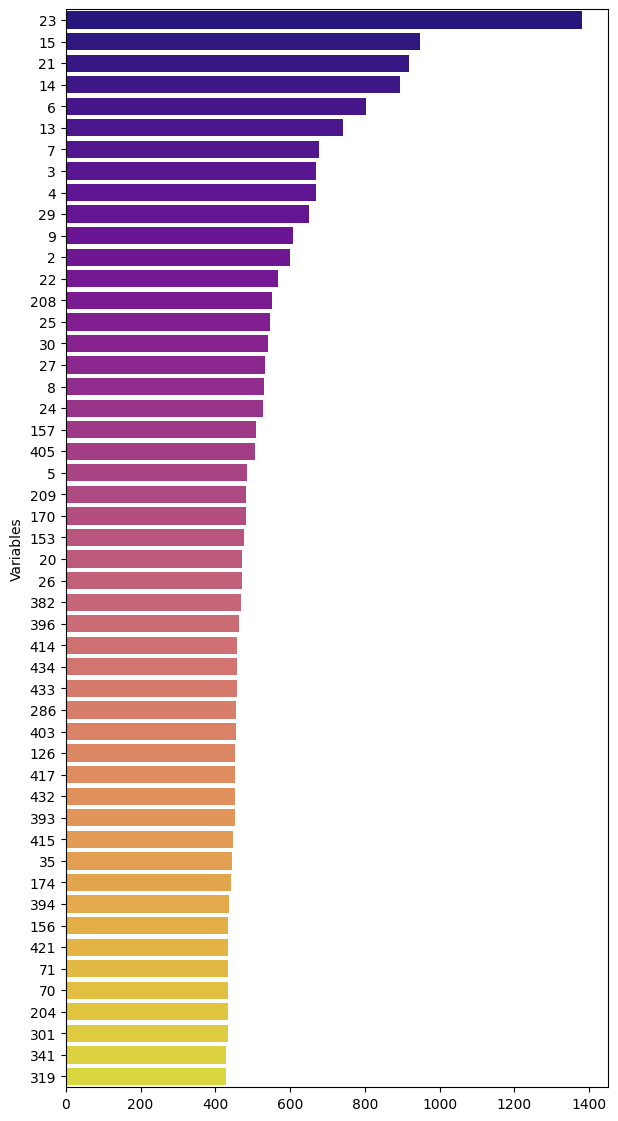

In [135]:
# Get 50 most important features:
cols = (feature_important_df[['Variables', 'importance']]
        .groupby('Variables')
        .mean()
        .sort_values(by='importance', ascending=False)[:50].index)

best_features = feature_important_df.loc[feature_important_df['Variables'].isin(cols)]
best_features = best_features.groupby('Variables')['importance'].mean()
best_features = best_features.sort_values(ascending=False)

plt.figure(figsize=(7,14))
y_line = best_features.index.astype(str)
x_line = best_features.values
sns.barplot(x=x_line, y=y_line, hue=y_line, palette='plasma')
#best_features.values

In [142]:
# In case we donot use "feature_important_df":
# df = training

# In case we use "feature_important_df":
df = training[cols]
testing = testing[cols]

target_trn = excl_lrg_missing_training['TARGET']

In [144]:
# MODEL BUILDING:

from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, roc_curve

params = {
    #'is_unbalance': 'true',
    #'n_estimators': 2000,
    #'colsample_bytree': 0.613,
    #'max_bin': 407,
    #'reg_alpha': 3.564,
    #'reg_lambda': 4.930,
    #'min_child_weight': 6,
    #'min_child_samples': 165,
    #'subsample': 0.708,
    #'early_stopping_rounds': 200,
    #....
    'objective': 'binary',
    'metric': 'auc',
    'boost': 'gbdt',
    'boost_from_average': 'false',
    'num_leaves': 13,
    'feature_fraction': 0.05,
    'bagging_fraction': 0.4,
    'bagging_freq': 5,
    'learning_rate': 0.01,
    'max_depth': 11,
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_threads': 6,
    'tree_learner': 'serial',
    'verbosity': -1,
    'silent': -1
}

num_round = 10000
n_Fold = 10

cv = StratifiedKFold(n_splits=n_Fold, shuffle=False)
oof = np.zeros(len(df))
predictions = np.zeros(len(testing))
feature_important_df = pd.DataFrame()


for fold_, (X_train_idx, X_test_idx) in enumerate(cv.split(df.values, target_trn.values)):
    print(f'Fold: {fold_+1}')
    X_train = df.iloc[X_train_idx]
    X_test = df.iloc[X_test_idx]
    y_train = target_trn.iloc[X_train_idx]
    y_test = target_trn.iloc[X_test_idx]

    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test)

    clf = lgb.train(params, train_data, num_round, valid_sets=[train_data, test_data])
    oof[X_test_idx] = clf.predict(X_test, num_iteration = clf.best_iteration)

    #fold_importance_df = pd.DataFrame()
    #fold_importance_df['Variables'] = variables
    #fold_importance_df['importance'] = clf.feature_importance()                               # How the model knows the order of variables list?
    #fold_importance_df['fold'] = fold_ + 1
    
    #feature_important_df = pd.concat([feature_important_df, fold_importance_df], axis=0)

    predictions += clf.predict(testing, num_iteration=clf.best_iteration) / cv.n_splits

print(f'CV score: {(roc_auc_score(target_trn, oof)):.5f}')

Fold: 1
Fold: 2
Fold: 3
Fold: 4
Fold: 5
Fold: 6
Fold: 7
Fold: 8
Fold: 9
Fold: 10
CV score: 0.77887


In [218]:
#num_round = 10000; 10-Fold (Full FE+)      Score: 0.79057 (Public) (Top 49%) (CV Score: 0.78471)        "LightGBM (5).csv"
#num_round = 10000; 15-Fold (Full FE+)      Score: 0.79001 (Public) (Top 49%) (CV Score: 0.78527)        "LightGBM (6).csv"
#num_round = 10000; 10-Fold (Full FE)       Score: 0.78397          (Top 52%) (CV Score: 0.78440)        "LightGBM (4).csv"
#num_round = 10000;  5-Fold (Full FE+)                                        (CV Score: 0.78333)
#num_round = 10000; 10-Fold (Feature_importance 50)                           (CV Score: 0.77887)             
#num_round = 10000; 10-Fold (EXT_SOURCE_xx) Score: 0.75890          (Top 68%) (CV Score: 0.76655)        "LightGBM (3).csv"
#num_round = 10000; 10-Fold                 Score: 0.72807          (Top 82%) (CV Score: 0.74402)        "LightGBM (2).csv"
#num_round = 20000; 10-Fold                                                   (CV Score: 0.74321)     
#num_round = 10000;  5-Fold                                                   (CV Score: 0.74239)        
#num_round = 20000;  5-Fold                                                   (CV Score: 0.74176)
#num_round = 10000; 10-Fold (New params set)                                  (CV Score: 0.73948)                      
#num_round = 1000 ; 10-Fold                 Score: 0.70482          (Top 85%) (CV Score: 0.72165)        "LightGBM (1).csv"


final_result = pd.DataFrame(data = {'SK_ID_CURR': excl_lrg_missing_testing['SK_ID_CURR'], 'TARGET': predictions})
final_result        

,SK_ID_CURR,TARGET
0,100001,0.039136
1,100005,0.094747
2,100013,0.048311
3,100028,0.054930
4,100038,0.169638
...,...,...
48739,456221,0.058908
48740,456222,0.040109
48741,456223,0.008789
48742,456224,0.028673


In [219]:
#final_result.to_csv("LightGBM (6).csv", index=False)

In [220]:
#feature_important_df.to_csv("Feature Importance.csv", index=False)